# PPO Tuning for Street Fighter II: Special Champions

In [2]:
import os
import sys
import copy
import time
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from typing import Any, Optional, Union

import cv2
import retro
from gymnasium import Env
from gymnasium.spaces import MultiBinary, Box
from gymnasium.core import ActType, ObsType, RenderFrame, SupportsFloat

from stable_baselines3 import PPO, A2C
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack, SubprocVecEnv

import fighter_envs
import fighter_plots

torch.cuda.device_count()

1

## PPO Baseline Testing: 0 Timesteps

Check model performance consistancy with a random seed, to see how it performs with different policies using default hyperparameters. 
Having this baseline will help in deducing if an improvement of model performance is reached through our hyperparameter experiments using grid search.

In [2]:
n_policy = ['CnnPolicy', 'MlpPolicy']
param_options = []
for policy in n_policy:
    param_options.append({"policy": policy})
    
total_timesteps = 0
n_procs = 0
render_mode = None
archs = []
count = 1
total = 20

for model_options in param_options:
    for _ in range(0, 10):
        Env = fighter_envs.make_env(fighter_envs.StreetFighter, n_procs, render_mode = render_mode)
        print(f'Starting architecture {count} of {total}')
        archs.append(fighter_envs.train_model(PPO, Env, model_options, total_timesteps = total_timesteps))
        count+=1
        Env.close()

Starting architecture 1 of 20


Output()

Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '[-1927.0, -529.0, -436.0, -1955.0, -1586.0]', '[5907, 7446, 16354, 6263, 9457]', '-1286.6', '9085.4', '-6433.0', '83.41105914115906'] at 1.3901843190193177 minutes.
Starting architecture 2 of 20
Learning...


Evaluating...
finished architecture ['CnnPolicy', '[-114.0, -1958.0, -1661.0, -563.0, -202.0]', '[22920, 6386, 15798, 12153, 22978]', '-899.6', '16047.0', '-4498.0', '156.49432706832886'] at 2.6082387844721477 minutes.
Starting architecture 3 of 20
Learning...


Output()

Evaluating...


Output()

finished architecture ['CnnPolicy', '[-1950.0, -274.0, -1634.0, -1950.0, -1711.0]', '[6597, 22567, 8378, 6555, 10662]', '-1503.8', '10951.8', '-7519.0', '102.3121588230133'] at 1.7052026470502217 minutes.
Starting architecture 4 of 20
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '[-583.0, -747.0, -1939.0, -1958.0, -481.0]', '[16022, 8017, 5699, 6648, 12017]', '-1141.6', '9680.6', '-5708.0', '89.39334869384766'] at 1.489889144897461 minutes.
Starting architecture 5 of 20
Learning...


Evaluating...
finished architecture ['CnnPolicy', '[-1978.0, -880.0, -340.0, -1634.0, -1949.0]', '[5501, 9365, 14999, 14253, 5576]', '-1356.2', '9938.8', '-6781.0', '91.82686924934387'] at 1.530447820822398 minutes.
Starting architecture 6 of 20


Output()

Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '[-1606.0, -504.0, -1946.0, -1562.0, -1693.0]', '[14323, 15270, 6103, 9958, 10028]', '-1462.2', '11136.4', '-7311.0', '103.9466814994812'] at 1.73244469165802 minutes.
Starting architecture 7 of 20
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '[-1557.0, -1537.0, -722.0, -740.0, -1939.0]', '[9342, 8959, 6499, 8258, 6435]', '-1299.0', '7898.6', '-6495.0', '78.15155005455017'] at 1.3025258342425028 minutes.
Starting architecture 8 of 20
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '[-1954.0, -1698.0, -298.0, -210.0, -1954.0]', '[6427, 11209, 25069, 25534, 6703]', '-1222.8', '14988.4', '-6114.0', '151.0899302959442'] at 2.5181655049324037 minutes.
Starting architecture 9 of 20
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '[-1763.0, -1957.0, -858.0, -839.0, -1657.0]', '[15514, 7013, 9065, 10291, 15191]', '-1414.8', '11414.8', '-7074.0', '123.17412424087524'] at 2.052902070681254 minutes.
Starting architecture 10 of 20
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '[-746.0, -1766.0, -1927.0, -1951.0, -529.0]', '[8355, 12296, 6433, 5925, 15677]', '-1383.8', '9737.2', '-6919.0', '90.3746886253357'] at 1.5062448104222617 minutes.
Starting architecture 11 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-1932.0, -804.0, -808.0, -1620.0, -1553.0]', '[5571, 7623, 9408, 12915, 9658]', '-1343.4', '9035.0', '-6717.0', '75.34941267967224'] at 1.255823544661204 minutes.
Starting architecture 12 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-1718.0, -778.0, -1944.0, -525.0, -749.0]', '[15680, 8182, 6896, 6289, 9136]', '-1142.8', '9236.6', '-5714.0', '76.43746066093445'] at 1.2739576776822408 minutes.
Starting architecture 13 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-461.0, -847.0, -777.0, -816.0, -1649.0]', '[13092, 7967, 8612, 9252, 13104]', '-910.0', '10405.4', '-4550.0', '86.52615880966187'] at 1.4421026468276978 minutes.
Starting architecture 14 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-776.0, -1967.0, -1211.0, -1402.0, -1959.0]', '[9907, 5796, 19488, 12795, 5690]', '-1463.0', '10735.2', '-7315.0', '90.03533601760864'] at 1.5005889336268108 minutes.
Starting architecture 15 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-1935.0, -1552.0, -561.0, -479.0, -406.0]', '[6010, 14592, 7714, 17075, 13867]', '-986.6', '11851.6', '-4933.0', '99.07668256759644'] at 1.6512780427932738 minutes.
Starting architecture 16 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-1881.0, -762.0, -1661.0, -1736.0, -1768.0]', '[9790, 7831, 10031, 10246, 14303]', '-1561.6', '10440.2', '-7808.0', '87.26514434814453'] at 1.4544190724690755 minutes.
Starting architecture 17 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-1572.0, -1648.0, -1395.0, -1708.0, -511.0]', '[12254, 14380, 11135, 16004, 15765]', '-1366.8', '13907.6', '-6834.0', '114.15366435050964'] at 1.902561072508494 minutes.
Starting architecture 18 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-1696.0, -1944.0, -1947.0, -1951.0, -354.0]', '[10437, 6583, 4839, 5657, 14459]', '-1578.4', '8395.0', '-7892.0', '69.7130298614502'] at 1.16188383102417 minutes.
Starting architecture 19 of 20
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '[-832.0, -1956.0, -1948.0, -1936.0, -1640.0]', '[12782, 5924, 5100, 5215, 12733]', '-1662.4', '8350.8', '-8312.0', '70.11169219017029'] at 1.1685282031695048 minutes.
Starting architecture 20 of 20
Learning...


Evaluating...
finished architecture ['MlpPolicy', '[-1937.0, -1115.0, -1936.0, -552.0, -670.0]', '[5887, 34769, 6917, 14527, 19787]', '-1242.0', '16377.4', '-6210.0', '136.85902619361877'] at 2.280983769893646 minutes.


In [13]:
base_run = pd.DataFrame(archs)
base_run.columns = ['Policy', 'Episode Rewards', 'Episode Stds', 'Mean Reward', 'Std Mean', 'Total Reward', 'Elapsed Time']

cols_to_numeric = ['Mean Reward', 'Std Mean', 'Total Reward', 'Elapsed Time']
arrs_to_numeric = ['Episode Rewards', 'Episode Stds']
for col in cols_to_numeric:
    base_run[col] = pd.to_numeric(base_run[col], errors='coerce')
    
total_time = base_run['Elapsed Time'].sum() / 60 / 60
print(f'total time: {total_time} hours')

total time: 0.5488062070475684 hours


In [14]:
base_run

,Policy,Episode Rewards,Episode Stds,Mean Reward,Std Mean,Total Reward,Elapsed Time
0,CnnPolicy,"[-1927.0, -529.0, -436.0, -1955.0, -1586.0]","[5907, 7446, 16354, 6263, 9457]",-1286.6,9085.4,-6433.0,83.411059
1,CnnPolicy,"[-114.0, -1958.0, -1661.0, -563.0, -202.0]","[22920, 6386, 15798, 12153, 22978]",-899.6,16047.0,-4498.0,156.494327
2,CnnPolicy,"[-1950.0, -274.0, -1634.0, -1950.0, -1711.0]","[6597, 22567, 8378, 6555, 10662]",-1503.8,10951.8,-7519.0,102.312159
3,CnnPolicy,"[-583.0, -747.0, -1939.0, -1958.0, -481.0]","[16022, 8017, 5699, 6648, 12017]",-1141.6,9680.6,-5708.0,89.393349
4,CnnPolicy,"[-1978.0, -880.0, -340.0, -1634.0, -1949.0]","[5501, 9365, 14999, 14253, 5576]",-1356.2,9938.8,-6781.0,91.826869
5,CnnPolicy,"[-1606.0, -504.0, -1946.0, -1562.0, -1693.0]","[14323, 15270, 6103, 9958, 10028]",-1462.2,11136.4,-7311.0,103.946681
6,CnnPolicy,"[-1557.0, -1537.0, -722.0, -740.0, -1939.0]","[9342, 8959, 6499, 8258, 6435]",-1299.0,7898.6,-6495.0,78.151550
7,CnnPolicy,"[-1954.0, -1698.0, -298.0, -210.0, -1954.0]","[6427, 11209, 25069, 25534, 6703]",-1222.8,14988.4,-6114.0,151.089930
8,CnnPolicy,"[-1763.0, -1957.0, -858.0, -839.0, -1657.0]","[15514, 7013, 9065, 10291, 15191]",-1414.8,11414.8,-7074.0,123.174124
9,CnnPolicy,"[-746.0, -1766.0, -1927.0, -1951.0, -529.0]","[8355, 12296, 6433, 5925, 15677]",-1383.8,9737.2,-6919.0,90.374689


In [15]:
%store base_run

Stored 'base_run' (DataFrame)


In [1]:
%store -r base_run

In [3]:
mlp_base_run = base_run[base_run['Policy'] == 'MlpPolicy']
mlp_base_run

,Policy,Episode Rewards,Episode Stds,Mean Reward,Std Mean,Total Reward,Elapsed Time
10,MlpPolicy,"[-1932.0, -804.0, -808.0, -1620.0, -1553.0]","[5571, 7623, 9408, 12915, 9658]",-1343.4,9035.0,-6717.0,75.349413
11,MlpPolicy,"[-1718.0, -778.0, -1944.0, -525.0, -749.0]","[15680, 8182, 6896, 6289, 9136]",-1142.8,9236.6,-5714.0,76.437461
12,MlpPolicy,"[-461.0, -847.0, -777.0, -816.0, -1649.0]","[13092, 7967, 8612, 9252, 13104]",-910.0,10405.4,-4550.0,86.526159
13,MlpPolicy,"[-776.0, -1967.0, -1211.0, -1402.0, -1959.0]","[9907, 5796, 19488, 12795, 5690]",-1463.0,10735.2,-7315.0,90.035336
14,MlpPolicy,"[-1935.0, -1552.0, -561.0, -479.0, -406.0]","[6010, 14592, 7714, 17075, 13867]",-986.6,11851.6,-4933.0,99.076683
15,MlpPolicy,"[-1881.0, -762.0, -1661.0, -1736.0, -1768.0]","[9790, 7831, 10031, 10246, 14303]",-1561.6,10440.2,-7808.0,87.265144
16,MlpPolicy,"[-1572.0, -1648.0, -1395.0, -1708.0, -511.0]","[12254, 14380, 11135, 16004, 15765]",-1366.8,13907.6,-6834.0,114.153664
17,MlpPolicy,"[-1696.0, -1944.0, -1947.0, -1951.0, -354.0]","[10437, 6583, 4839, 5657, 14459]",-1578.4,8395.0,-7892.0,69.713030
18,MlpPolicy,"[-832.0, -1956.0, -1948.0, -1936.0, -1640.0]","[12782, 5924, 5100, 5215, 12733]",-1662.4,8350.8,-8312.0,70.111692
19,MlpPolicy,"[-1937.0, -1115.0, -1936.0, -552.0, -670.0]","[5887, 34769, 6917, 14527, 19787]",-1242.0,16377.4,-6210.0,136.859026


In [4]:
cnn_base_run = base_run[base_run['Policy'] == 'CnnPolicy']
cnn_base_run

,Policy,Episode Rewards,Episode Stds,Mean Reward,Std Mean,Total Reward,Elapsed Time
0,CnnPolicy,"[-1927.0, -529.0, -436.0, -1955.0, -1586.0]","[5907, 7446, 16354, 6263, 9457]",-1286.6,9085.4,-6433.0,83.411059
1,CnnPolicy,"[-114.0, -1958.0, -1661.0, -563.0, -202.0]","[22920, 6386, 15798, 12153, 22978]",-899.6,16047.0,-4498.0,156.494327
2,CnnPolicy,"[-1950.0, -274.0, -1634.0, -1950.0, -1711.0]","[6597, 22567, 8378, 6555, 10662]",-1503.8,10951.8,-7519.0,102.312159
3,CnnPolicy,"[-583.0, -747.0, -1939.0, -1958.0, -481.0]","[16022, 8017, 5699, 6648, 12017]",-1141.6,9680.6,-5708.0,89.393349
4,CnnPolicy,"[-1978.0, -880.0, -340.0, -1634.0, -1949.0]","[5501, 9365, 14999, 14253, 5576]",-1356.2,9938.8,-6781.0,91.826869
5,CnnPolicy,"[-1606.0, -504.0, -1946.0, -1562.0, -1693.0]","[14323, 15270, 6103, 9958, 10028]",-1462.2,11136.4,-7311.0,103.946681
6,CnnPolicy,"[-1557.0, -1537.0, -722.0, -740.0, -1939.0]","[9342, 8959, 6499, 8258, 6435]",-1299.0,7898.6,-6495.0,78.151550
7,CnnPolicy,"[-1954.0, -1698.0, -298.0, -210.0, -1954.0]","[6427, 11209, 25069, 25534, 6703]",-1222.8,14988.4,-6114.0,151.089930
8,CnnPolicy,"[-1763.0, -1957.0, -858.0, -839.0, -1657.0]","[15514, 7013, 9065, 10291, 15191]",-1414.8,11414.8,-7074.0,123.174124
9,CnnPolicy,"[-746.0, -1766.0, -1927.0, -1951.0, -529.0]","[8355, 12296, 6433, 5925, 15677]",-1383.8,9737.2,-6919.0,90.374689


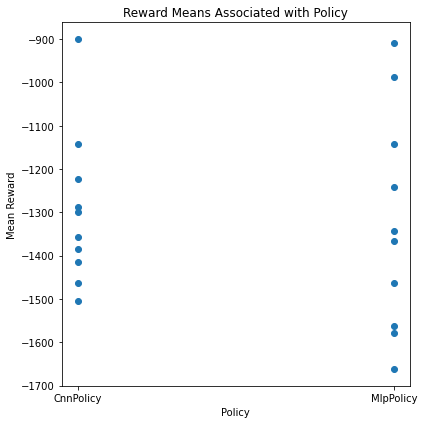

In [5]:
fighter_plots.plot_reward_mean(base_run, 'Policy')

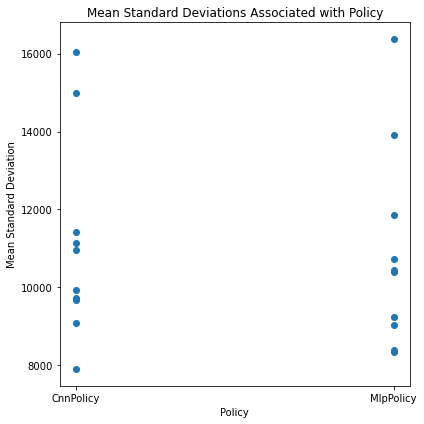

In [6]:
fighter_plots.plot_reward_std(base_run, 'Policy')

In [ ]:
mlp_i = np.argmax(mlp_base_run['Mean Reward'])
mlp_winner = mlp_base_run.iloc[mlp_i]
print("The MlpPolicy model with the highest reward mean, during the 0 time step base run, is:")
print(mlp_winner)

In [ ]:
cnn_i = np.argmax(cnn_base_run['Mean Reward'])
cnn_winner = cnn_base_run.iloc[cnn_i]
print("The CnnPolicy model with the highest reward mean, during 0 time step base run, is:")
print(cnn_winner)

In [9]:
del n_policy, param_options, archs
torch.cuda.empty_cache()
gc.collect()

## PPO Baseline Testing: 50,000 Timesteps

In [ ]:
n_policy = ['CnnPolicy', 'MlpPolicy']
param_options = []
for policy in n_policy:
    param_options.append({"policy": policy})
    
total_timesteps = 50,000
n_procs = 0
render_mode = None
archs = []
count = 1
total = 20

for model_options in param_options:
    for _ in range(0, 10):
        Env = fighter_envs.make_env(fighter_envs.StreetFighter, n_procs, render_mode = render_mode)
        print(f'Starting architecture {count} of {total}')
        archs.append(fighter_envs.train_model(PPO, Env, model_options, total_timesteps = total_timesteps))
        count+=1
        Env.close()

In [ ]:
base_run_50K = pd.DataFrame(archs)
base_run_50K.columns = ['Policy', 'Episode Rewards', 'Episode Stds', 'Mean Reward', 'Std Mean', 'Total Reward', 'Elapsed Time']

cols_to_numeric = ['Mean Reward', 'Std Mean', 'Total Reward', 'Elapsed Time']
arrs_to_numeric = ['Episode Rewards', 'Episode Stds']
for col in cols_to_numeric:
    base_run_50K[col] = pd.to_numeric(base_run_50K[col], errors='coerce')
    
total_time = base_run_50K['Elapsed Time'].sum() / 60 / 60
print(f'total time: {total_time} hours')

In [ ]:
%store base_run_50K

In [ ]:
mlp_base_run = base_run_50K[base_run_50K['Policy'] == 'MlpPolicy']
mlp_base_run

In [ ]:
cnn_base_run = base_run_50K[base_run_50K['Policy'] == 'CnnPolicy']
cnn_base_run

In [ ]:
mlp_i = np.argmax(mlp_base_run['Mean Reward'])
mlp_winner = mlp_base_run.iloc[mlp_i]
print("The MlpPolicy model with the highest reward mean, during the 0 time step base run, is:")
print(mlp_winner)

In [ ]:
cnn_i = np.argmax(cnn_base_run['Mean Reward'])
cnn_winner = cnn_base_run.iloc[cnn_i]
print("The CnnPolicy model with the highest reward mean, during 0 time step base run, is:")
print(cnn_winner)

In [ ]:
fighter_plots.plot_reward_mean(base_run_50K, 'Policy')

In [ ]:
fighter_plots.plot_reward_std(base_run_50K, 'Policy')

In [ ]:
del n_policy, param_options, archs, cnn_base_run, mlp_base_run
torch.cuda.empty_cache()
gc.collect()

## Hyperparameter Testing: Policy, Learning Rate, Batches, and Steps

Warning: Kernel will restart during these trainings **unless** Jupyter Notebook's max buffer size has been increased or memory requirements are met. The max buffer size was raised to 7GB for this experiment.

Below is a method for creating the first round of model options for the expiriment. The hope was to create a function that would work well in the second round of expiriments. Since the second round requires an assignment of all hyperparamters, a function would have to many input variables.

In [10]:
def create_ppo_first_options(n_policy, n_learning_rate, n_batch_size, n_batches):
    models = []
    for policy in n_policy:
        for learning_rate in n_learning_rate:
            for batch_size in n_batch_size:
                for batches in n_batches:
                        models.append({"policy": policy, "learning_rate": learning_rate, 
                                       "n_steps": batch_size * batches, "batch_size": batch_size, "seed": 2})
    return models

In [11]:
n_policy = ['CnnPolicy', 'MlpPolicy']
n_learning_rate = [0.01, 0.001, 0.0001, 0.00001]
batch_size = [32, 64, 128, 256]
n_batches = [4, 16, 32, 64]

'''
Stochastic Episodes are used to collect mean and standard deviation reward values for analysis. 

DEFAULT VALUES FOR MODEL HYPERPARAMETERS NOT TESTED HERE

n_epochs = 10
gamma = 0.9
gae_lambda = 0.95
clip_range = 0.2

THESE ARE TO BE TESTED IN A LATER EXPERIMENT

'''
total_timesteps = 50000
n_procs = 0
render_mode = None
archs = []

models = create_ppo_first_options(n_policy, n_learning_rate, batch_size, n_batches)
count = 1
total = len(models)
for model_options in models:
    Env = fighter_envs.make_env(fighter_envs.StreetFighter, n_procs, render_mode = render_mode)
    print("------------")
    print(f'Starting architecture {count} of {total}')
    archs.append(fighter_envs.train_model(PPO, Env, model_options, total_timesteps = total_timesteps))
    count+=1
    Env.close()

------------
Starting architecture 1 of 128


Output()

Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '128', '32', '2', '[-2000.0, -2000.0, -1987.0, -1982.0, -1997.0]', '[8641, 8290, 9528, 9347, 7895]', '-1993.2', '8740.2', '-9966.0', '328.85168862342834'] at 5.480861477057139 minutes.
------------
Starting architecture 2 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '512', '32', '2', '[-1980.0, -1980.0, -1980.0, -1980.0, -1990.0]', '[6365, 6252, 5650, 7002, 6142]', '-1982.0', '6282.2', '-9910.0', '290.47044801712036'] at 4.841174133618673 minutes.
------------
Starting architecture 3 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '1024', '32', '2', '[-1971.0, -1973.0, -1969.0, -1969.0, -1974.0]', '[8407, 7625, 9607, 8650, 7303]', '-1971.2', '8318.4', '-9856.0', '314.5075750350952'] at 5.241792917251587 minutes.
------------
Starting architecture 4 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '2048', '32', '2', '[-1975.0, -1990.0, -1980.0, -2000.0, -1990.0]', '[3431, 3539, 3528, 3622, 4121]', '-1987.0', '3648.2', '-9935.0', '274.52784752845764'] at 4.575464125474294 minutes.
------------
Starting architecture 5 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '256', '64', '2', '[-1974.0, -1985.0, -1972.0, -1986.0, -1987.0]', '[9065, 9407, 9564, 7726, 7511]', '-1980.8', '8654.6', '-9904.0', '270.41614508628845'] at 4.5069357514381405 minutes.
------------
Starting architecture 6 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '1024', '64', '2', '[-1990.0, -1990.0, -1990.0, -1990.0, -1990.0]', '[5316, 5316, 5316, 5316, 5316]', '-1990.0', '5316.0', '-9950.0', '228.20648765563965'] at 3.8034414609273273 minutes.
------------
Starting architecture 7 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '2048', '64', '2', '[-1981.0, -1977.0, -1975.0, -1958.0, -1980.0]', '[6050, 4609, 6566, 7153, 4918]', '-1974.2', '5859.2', '-9871.0', '248.12877345085144'] at 4.1354795575141905 minutes.
------------
Starting architecture 8 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '4096', '64', '2', '[-1968.0, -1975.0, -1977.0, -1980.0, -1974.0]', '[5858, 6007, 7962, 6255, 6599]', '-1974.8', '6536.2', '-9874.0', '275.6471471786499'] at 4.594119119644165 minutes.
------------
Starting architecture 9 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '512', '128', '2', '[-1990.0, -1990.0, -1990.0, -1990.0, -1990.0]', '[5858, 5598, 5858, 5540, 5858]', '-1990.0', '5742.4', '-9950.0', '220.89921021461487'] at 3.6816535035769147 minutes.
------------
Starting architecture 10 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '2048', '128', '2', '[-1980.0, -1980.0, -1980.0, -1984.0, -1990.0]', '[4854, 4271, 4767, 4683, 5258]', '-1982.8', '4766.6', '-9914.0', '205.8885726928711'] at 3.4314762115478517 minutes.
------------
Starting architecture 11 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '4096', '128', '2', '[-2000.0, -2000.0, -2000.0, -2000.0, -2000.0]', '[7420, 6649, 7068, 6916, 7016]', '-2000.0', '7013.8', '-10000.0', '248.71348023414612'] at 4.145224670569102 minutes.
------------
Starting architecture 12 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '8192', '128', '2', '[-821.0, -1662.0, -1641.0, -1939.0, -1595.0]', '[9173, 10709, 11397, 4401, 8668]', '-1531.6', '8869.6', '-7658.0', '281.938453912735'] at 4.698974231878917 minutes.
------------
Starting architecture 13 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '1024', '256', '2', '[-1980.0, -1980.0, -1980.0, -1980.0, -1980.0]', '[6101, 6101, 6101, 6101, 6101]', '-1980.0', '6101.0', '-9900.0', '206.61470818519592'] at 3.443578469753265 minutes.
------------
Starting architecture 14 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '4096', '256', '2', '[-1977.0, -1980.0, -1995.0, -1980.0, -1980.0]', '[5688, 6201, 5701, 4555, 6263]', '-1982.4', '5681.6', '-9912.0', '221.50408673286438'] at 3.691734778881073 minutes.
------------
Starting architecture 15 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '8192', '256', '2', '[-1948.0, -1937.0, -1933.0, -1725.0, -1946.0]', '[5412, 7298, 6203, 11447, 6272]', '-1897.8', '7326.4', '-9489.0', '257.70759773254395'] at 4.295126628875733 minutes.
------------
Starting architecture 16 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.01', '16384', '256', '2', '[-1939.0, -862.0, -829.0, -1945.0, -1946.0]', '[7156, 9853, 9516, 5627, 5557]', '-1504.2', '7541.8', '-7521.0', '286.20110750198364'] at 4.770018458366394 minutes.
------------
Starting architecture 17 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '128', '32', '2', '[-1980.0, -1980.0, -1980.0, -1980.0, -1980.0]', '[6101, 6101, 6101, 6101, 6101]', '-1980.0', '6101.0', '-9900.0', '286.48506355285645'] at 4.774751059214274 minutes.
------------
Starting architecture 18 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '512', '32', '2', '[-2000.0, -2000.0, -2000.0, -2000.0, -2000.0]', '[5871, 5871, 5871, 5871, 5871]', '-2000.0', '5871.0', '-10000.0', '284.9506652355194'] at 4.7491777539253235 minutes.
------------
Starting architecture 19 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '1024', '32', '2', '[-1990.0, -1990.0, -1990.0, -1990.0, -1990.0]', '[6757, 6743, 6738, 7671, 8050]', '-1990.0', '7191.8', '-9950.0', '285.6820912361145'] at 4.761368187268575 minutes.
------------
Starting architecture 20 of 128
Learning...


Evaluating...
finished architecture ['CnnPolicy', '0.001', '2048', '32', '2', '[-2000.0, -2000.0, -2000.0, -2000.0, -2000.0]', '[9185, 9185, 9185, 9185, 9185]', '-2000.0', '9185.0', '-10000.0', '332.44572615623474'] at 5.540762102603912 minutes.
------------
Starting architecture 21 of 128


Output()

Learning...


Evaluating...
finished architecture ['CnnPolicy', '0.001', '256', '64', '2', '[-1958.0, -1975.0, -1958.0, -1967.0, -1957.0]', '[6249, 6088, 5779, 5640, 5702]', '-1963.0', '5891.6', '-9815.0', '259.21038150787354'] at 4.320173025131226 minutes.
------------
Starting architecture 22 of 128


Output()

Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '1024', '64', '2', '[-1980.0, -1977.0, -1980.0, -1980.0, -1980.0]', '[5829, 6177, 6356, 6914, 6356]', '-1979.4', '6326.4', '-9897.0', '247.98492693901062'] at 4.133082115650177 minutes.
------------
Starting architecture 23 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '2048', '64', '2', '[-2000.0, -2000.0, -2000.0, -2000.0, -2000.0]', '[9652, 9652, 9652, 9652, 9652]', '-2000.0', '9652.0', '-10000.0', '293.70792865753174'] at 4.895132144292195 minutes.
------------
Starting architecture 24 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '4096', '64', '2', '[-1998.0, -1996.0, -2000.0, -1989.0, -1997.0]', '[6591, 7585, 7370, 5292, 6575]', '-1996.0', '6682.6', '-9980.0', '276.9092228412628'] at 4.615153714021047 minutes.
------------
Starting architecture 25 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '512', '128', '2', '[-1990.0, -1990.0, -1990.0, -1990.0, -1990.0]', '[3374, 3374, 3374, 3374, 3374]', '-1990.0', '3374.0', '-9950.0', '197.73469400405884'] at 3.2955782334009807 minutes.
------------
Starting architecture 26 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '2048', '128', '2', '[-1980.0, -1980.0, -1980.0, -1980.0, -1980.0]', '[7269, 6233, 7324, 7324, 7324]', '-1980.0', '7094.8', '-9900.0', '247.1364951133728'] at 4.11894158522288 minutes.
------------
Starting architecture 27 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '4096', '128', '2', '[-1980.0, -1980.0, -1980.0, -1980.0, -1980.0]', '[7722, 7722, 7722, 7722, 7722]', '-1980.0', '7722.0', '-9900.0', '263.02922892570496'] at 4.383820482095083 minutes.
------------
Starting architecture 28 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '8192', '128', '2', '[-2000.0, -1990.0, -1996.0, -1990.0, -2000.0]', '[7326, 7818, 8514, 6741, 6914]', '-1995.2', '7462.6', '-9976.0', '286.14911556243896'] at 4.769151926040649 minutes.
------------
Starting architecture 29 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '1024', '256', '2', '[-1990.0, -1990.0, -1990.0, -1990.0, -1990.0]', '[5316, 5316, 5316, 5316, 5316]', '-1990.0', '5316.0', '-9950.0', '212.49429154396057'] at 3.5415715257326763 minutes.
------------
Starting architecture 30 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '4096', '256', '2', '[-2000.0, -1990.0, -1990.0, -2000.0, -2000.0]', '[5882, 5892, 6486, 6186, 5651]', '-1996.0', '6019.4', '-9980.0', '233.68779253959656'] at 3.8947965423266093 minutes.
------------
Starting architecture 31 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '8192', '256', '2', '[-2000.0, -2000.0, -2000.0, -2000.0, -2000.0]', '[9323, 8553, 8005, 8335, 9062]', '-2000.0', '8655.6', '-10000.0', '275.766165971756'] at 4.596102766195933 minutes.
------------
Starting architecture 32 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.001', '16384', '256', '2', '[-1980.0, -1980.0, -1980.0, -1976.0, -1980.0]', '[7860, 8762, 8612, 7856, 7632]', '-1979.2', '8144.4', '-9896.0', '308.6833701133728'] at 5.14472283522288 minutes.
------------
Starting architecture 33 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '128', '32', '2', '[-2000.0, -2000.0, -2000.0, -2000.0, -2000.0]', '[9590, 9590, 9156, 9652, 9590]', '-2000.0', '9515.6', '-10000.0', '324.7134521007538'] at 5.411890868345896 minutes.
------------
Starting architecture 34 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '512', '32', '2', '[-1990.0, -1980.0, -1970.0, -1980.0, -1980.0]', '[5439, 6951, 5933, 6217, 5011]', '-1980.0', '5910.2', '-9900.0', '283.6255886554718'] at 4.727093144257863 minutes.
------------
Starting architecture 35 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '1024', '32', '2', '[-1979.0, -1980.0, -1979.0, -1976.0, -1978.0]', '[4750, 4857, 4948, 5383, 5385]', '-1978.4', '5064.6', '-9892.0', '286.1682448387146'] at 4.76947074731191 minutes.
------------
Starting architecture 36 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '2048', '32', '2', '[-1984.0, -1971.0, -1985.0, -1974.0, -1978.0]', '[7151, 7838, 7502, 7064, 7081]', '-1978.4', '7327.2', '-9892.0', '310.305330991745'] at 5.171755516529084 minutes.
------------
Starting architecture 37 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '256', '64', '2', '[-1980.0, -1980.0, -1980.0, -1980.0, -1980.0]', '[3352, 3352, 3259, 3352, 3352]', '-1980.0', '3333.4', '-9900.0', '213.68174695968628'] at 3.561362449328105 minutes.
------------
Starting architecture 38 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '1024', '64', '2', '[-1959.0, -1969.0, -1987.0, -1973.0, -1963.0]', '[7527, 6865, 6783, 8192, 6493]', '-1970.2', '7172.0', '-9851.0', '254.87804794311523'] at 4.247967465718587 minutes.
------------
Starting architecture 39 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '2048', '64', '2', '[-2000.0, -2000.0, -2000.0, -2000.0, -2000.0]', '[9566, 9533, 9586, 9562, 9581]', '-2000.0', '9565.6', '-10000.0', '283.0406861305237'] at 4.717344768842062 minutes.
------------
Starting architecture 40 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '4096', '64', '2', '[-1973.0, -1986.0, -1954.0, -1979.0, -1974.0]', '[6516, 8619, 8174, 7003, 7245]', '-1973.2', '7511.4', '-9866.0', '270.81761360168457'] at 4.513626893361409 minutes.
------------
Starting architecture 41 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '512', '128', '2', '[-1980.0, -1980.0, -1980.0, -1980.0, -1980.0]', '[8540, 7710, 7704, 7716, 8317]', '-1980.0', '7997.4', '-9900.0', '235.79354906082153'] at 3.9298924843470258 minutes.
------------
Starting architecture 42 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '2048', '128', '2', '[-1979.0, -1993.0, -1981.0, -1963.0, -1967.0]', '[6012, 6427, 5672, 6729, 4916]', '-1976.6', '5951.2', '-9883.0', '231.4985716342926'] at 3.85830952723821 minutes.
------------
Starting architecture 43 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '4096', '128', '2', '[-1968.0, -1961.0, -1968.0, -1968.0, -1960.0]', '[7714, 7937, 7397, 7943, 6774]', '-1965.0', '7553.0', '-9825.0', '255.9288387298584'] at 4.26548064549764 minutes.
------------
Starting architecture 44 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '8192', '128', '2', '[-1953.0, -1979.0, -1975.0, -1976.0, -1982.0]', '[5867, 6859, 5436, 6789, 5892]', '-1973.0', '6168.6', '-9865.0', '256.7168216705322'] at 4.278613694508871 minutes.
------------
Starting architecture 45 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '1024', '256', '2', '[-1946.0, -1963.0, -1953.0, -1967.0, -1953.0]', '[8542, 8769, 7324, 6675, 7832]', '-1956.4', '7828.4', '-9782.0', '225.17478775978088'] at 3.7529131293296816 minutes.
------------
Starting architecture 46 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '4096', '256', '2', '[-1979.0, -1997.0, -2000.0, -1976.0, -1977.0]', '[6238, 6505, 6684, 7233, 6870]', '-1985.8', '6706.0', '-9929.0', '233.1386682987213'] at 3.8856444716453553 minutes.
------------
Starting architecture 47 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '8192', '256', '2', '[-1939.0, -783.0, -1966.0, -1967.0, -729.0]', '[8445, 10369, 6058, 6385, 8557]', '-1476.8', '7962.8', '-7384.0', '258.28862023353577'] at 4.304810337225596 minutes.
------------
Starting architecture 48 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '0.0001', '16384', '256', '2', '[-1968.0, -1958.0, -841.0, -1948.0, -1972.0]', '[6579, 6102, 11193, 6202, 7079]', '-1737.4', '7431.0', '-8687.0', '290.93559765815735'] at 4.848926627635956 minutes.
------------
Starting architecture 49 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '128', '32', '2', '[-1924.0, -387.0, -624.0, -844.0, -1735.0]', '[7181, 11945, 16514, 9322, 11868]', '-1102.8', '11366.0', '-5514.0', '332.7924745082855'] at 5.546541241804759 minutes.
------------
Starting architecture 50 of 128
Learning...


Evaluating...
finished architecture ['CnnPolicy', '1e-05', '512', '32', '2', '[-1960.0, -1706.0, -825.0, -1985.0, -724.0]', '[4804, 13448, 6762, 5494, 7194]', '-1440.0', '7540.4', '-7200.0', '310.03958439826965'] at 5.1673264066378275 minutes.
------------
Starting architecture 51 of 128


Output()

Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '1024', '32', '2', '[-781.0, -1848.0, -1946.0, -1961.0, -1965.0]', '[10289, 17201, 8092, 6363, 5797]', '-1700.2', '9548.4', '-8501.0', '323.5593264102936'] at 5.39265544017156 minutes.
------------
Starting architecture 52 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '2048', '32', '2', '[-1965.0, -1938.0, -1619.0, -623.0, -364.0]', '[4180, 6119, 10640, 17102, 14482]', '-1301.8', '10504.6', '-6509.0', '334.92416286468506'] at 5.582069381078084 minutes.
------------
Starting architecture 53 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '256', '64', '2', '[-1953.0, -1706.0, -670.0, -1932.0, -666.0]', '[5005, 14256, 8356, 5563, 9165]', '-1385.4', '8469.0', '-6927.0', '269.168479681015'] at 4.486141328016917 minutes.
------------
Starting architecture 54 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '1024', '64', '2', '[-864.0, -857.0, -1979.0, -847.0, -1734.0]', '[12584, 11252, 4263, 11369, 11471]', '-1256.2', '10187.8', '-6281.0', '275.6587884426117'] at 4.594313140710195 minutes.
------------
Starting architecture 55 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '2048', '64', '2', '[-370.0, -1586.0, -1611.0, -509.0, -1632.0]', '[12932, 9960, 14475, 7624, 9687]', '-1141.6', '10935.6', '-5708.0', '292.6407878398895'] at 4.877346463998159 minutes.
------------
Starting architecture 56 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '4096', '64', '2', '[-1819.0, -734.0, -1952.0, -848.0, -1614.0]', '[16223, 8127, 6981, 8435, 13404]', '-1393.4', '10634.0', '-6967.0', '304.1216492652893'] at 5.068694154421489 minutes.
------------
Starting architecture 57 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '[-466.0, -807.0, -1249.0, -1575.0, -774.0]', '[15333, 10038, 21335, 17043, 8704]', '-974.2', '14490.6', '-4871.0', '296.12417221069336'] at 4.935402870178223 minutes.
------------
Starting architecture 58 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '2048', '128', '2', '[-540.0, -1929.0, -1970.0, -796.0, -1936.0]', '[20901, 6062, 6505, 7287, 5746]', '-1434.2', '9300.2', '-7171.0', '247.70768356323242'] at 4.12846139272054 minutes.
------------
Starting architecture 59 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '4096', '128', '2', '[-793.0, -1527.0, -1449.0, -740.0, -1660.0]', '[28175, 12406, 13911, 8814, 12343]', '-1233.8', '15129.8', '-6169.0', '318.9713258743286'] at 5.316188764572144 minutes.
------------
Starting architecture 60 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '8192', '128', '2', '[-1618.0, -759.0, -880.0, -786.0, -1723.0]', '[10224, 12603, 8987, 6936, 12750]', '-1153.2', '10300.0', '-5766.0', '293.2070097923279'] at 4.886783496538798 minutes.
------------
Starting architecture 61 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '1024', '256', '2', '[-1548.0, -1959.0, -1632.0, -1936.0, -561.0]', '[14359, 5874, 14224, 5509, 11745]', '-1527.2', '10342.2', '-7636.0', '249.3258397579193'] at 4.155430662631988 minutes.
------------
Starting architecture 62 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '4096', '256', '2', '[-1330.0, -811.0, -793.0, -1941.0, -468.0]', '[13815, 8040, 9600, 5703, 17306]', '-1068.6', '10892.8', '-5343.0', '277.96212577819824'] at 4.632702096303304 minutes.
------------
Starting architecture 63 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '8192', '256', '2', '[-1601.0, -820.0, -1608.0, -1963.0, -318.0]', '[13506, 7536, 10620, 6463, 10507]', '-1262.0', '9726.4', '-6310.0', '276.69671607017517'] at 4.611611934502919 minutes.
------------
Starting architecture 64 of 128
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '16384', '256', '2', '[-1582.0, -1945.0, -1639.0, -683.0, -449.0]', '[14803, 5971, 10533, 6074, 13374]', '-1259.6', '10151.0', '-6298.0', '317.5092089176178'] at 5.291820148626964 minutes.
------------
Starting architecture 65 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '128', '32', '2', '[-1980.0, -1980.0, -1980.0, -1980.0, -1970.0]', '[3428, 3396, 3393, 4810, 4813]', '-1978.0', '3968.0', '-9890.0', '246.63948559761047'] at 4.110658093293508 minutes.
------------
Starting architecture 66 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '512', '32', '2', '[-1980.0, -1979.0, -1975.0, -1977.0, -1971.0]', '[6628, 5672, 6615, 6280, 7561]', '-1976.4', '6551.2', '-9882.0', '269.68254709243774'] at 4.494709118207296 minutes.
------------
Starting architecture 67 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '1024', '32', '2', '[-1962.0, -695.0, -1958.0, -1968.0, -864.0]', '[7917, 7437, 6266, 6117, 10518]', '-1489.4', '7651.0', '-7447.0', '281.73224449157715'] at 4.695537408192952 minutes.
------------
Starting architecture 68 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '2048', '32', '2', '[-2000.0, -1990.0, -2000.0, -2000.0, -2000.0]', '[6755, 6995, 7135, 7290, 6680]', '-1998.0', '6971.0', '-9990.0', '283.176682472229'] at 4.71961137453715 minutes.
------------
Starting architecture 69 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '256', '64', '2', '[-1980.0, -1979.0, -2000.0, -1980.0, -1990.0]', '[6766, 5970, 4295, 5983, 4526]', '-1985.8', '5508.0', '-9929.0', '219.51326251029968'] at 3.6585543751716614 minutes.
------------
Starting architecture 70 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '1024', '64', '2', '[-1971.0, -1961.0, -1962.0, -1977.0, -1965.0]', '[5493, 5454, 6782, 4035, 4390]', '-1967.2', '5230.8', '-9836.0', '215.5141282081604'] at 3.5919021368026733 minutes.
------------
Starting architecture 71 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '2048', '64', '2', '[-1977.0, -1994.0, -1985.0, -1980.0, -1980.0]', '[6192, 6135, 4937, 4433, 5975]', '-1983.2', '5534.4', '-9916.0', '230.0848982334137'] at 3.8347483038902284 minutes.
------------
Starting architecture 72 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '4096', '64', '2', '[-1965.0, -1759.0, -872.0, -1965.0, -555.0]', '[5764, 15468, 9509, 4868, 6467]', '-1423.2', '8415.2', '-7116.0', '260.5662364959717'] at 4.3427706082661945 minutes.
------------
Starting architecture 73 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '512', '128', '2', '[-1948.0, -1977.0, -1944.0, -1957.0, -785.0]', '[5506, 5061, 6164, 5052, 7200]', '-1722.2', '5796.6', '-8611.0', '193.5984926223755'] at 3.226641543706258 minutes.
------------
Starting architecture 74 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '2048', '128', '2', '[-789.0, -728.0, -737.0, -132.0, -1938.0]', '[9312, 8447, 7675, 14525, 5159]', '-864.8', '9023.6', '-4324.0', '234.28647780418396'] at 3.9047746300697326 minutes.
------------
Starting architecture 75 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '4096', '128', '2', '[-1975.0, -1965.0, -854.0, -1955.0, -1970.0]', '[4762, 6668, 8617, 7011, 6361]', '-1743.8', '6683.8', '-8719.0', '209.52155375480652'] at 3.492025895913442 minutes.
------------
Starting architecture 76 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '8192', '128', '2', '[-1980.0, -1980.0, -1980.0, -1999.0, -1990.0]', '[8185, 8457, 8097, 8142, 9556]', '-1985.8', '8487.4', '-9929.0', '252.60190796852112'] at 4.2100317994753516 minutes.
------------
Starting architecture 77 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '1024', '256', '2', '[-1973.0, -1964.0, -1958.0, -1977.0, -1976.0]', '[5501, 5719, 7202, 6321, 6469]', '-1969.6', '6242.4', '-9848.0', '188.36578106880188'] at 3.139429684480031 minutes.
------------
Starting architecture 78 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '4096', '256', '2', '[-790.0, -901.0, -1957.0, -1946.0, -1956.0]', '[9364, 8165, 6800, 7362, 6087]', '-1510.0', '7555.6', '-7550.0', '221.18429517745972'] at 3.6864049196243287 minutes.
------------
Starting architecture 79 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '8192', '256', '2', '[-1597.0, -751.0, -499.0, -1528.0, -463.0]', '[11228, 12170, 7058, 14006, 13737]', '-967.6', '11639.8', '-4838.0', '274.98986172676086'] at 4.583164362112681 minutes.
------------
Starting architecture 80 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.01', '16384', '256', '2', '[-843.0, -823.0, -1727.0, -1613.0, -1787.0]', '[9643, 8889, 11228, 9907, 15886]', '-1358.6', '11110.6', '-6793.0', '300.9396622180939'] at 5.015661036968231 minutes.
------------
Starting architecture 81 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '128', '32', '2', '[-1956.0, -714.0, -1980.0, -1948.0, -1949.0]', '[7302, 8959, 6813, 7336, 6847]', '-1709.4', '7451.4', '-8547.0', '266.72793889045715'] at 4.445465648174286 minutes.
------------
Starting architecture 82 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '512', '32', '2', '[-604.0, -699.0, -1710.0, -1673.0, -1938.0]', '[13767, 7219, 14089, 10516, 6244]', '-1324.8', '10367.0', '-6624.0', '298.5320541858673'] at 4.9755342364311215 minutes.
------------
Starting architecture 83 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '1024', '32', '2', '[-1954.0, -1952.0, -1932.0, -764.0, -1960.0]', '[6382, 6409, 7298, 7472, 7029]', '-1712.4', '6918.0', '-8562.0', '279.98211216926575'] at 4.666368536154429 minutes.
------------
Starting architecture 84 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '2048', '32', '2', '[-1735.0, -963.0, -874.0, -1619.0, -1964.0]', '[10822, 29528, 7645, 9104, 6535]', '-1431.0', '12726.8', '-7155.0', '329.65255069732666'] at 5.494209178288778 minutes.
------------
Starting architecture 85 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '256', '64', '2', '[-1936.0, -796.0, -1933.0, -685.0, -1690.0]', '[7400, 9965, 6649, 7118, 14187]', '-1408.0', '9063.8', '-7040.0', '245.4419550895691'] at 4.090699251492818 minutes.
------------
Starting architecture 86 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '1024', '64', '2', '[-1572.0, -1765.0, -1933.0, -857.0, -692.0]', '[12151, 11790, 5633, 9353, 15598]', '-1363.8', '10905.0', '-6819.0', '266.80628633499146'] at 4.4467714389165245 minutes.
------------
Starting architecture 87 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '2048', '64', '2', '[-1596.0, -1485.0, -1696.0, -1952.0, -1941.0]', '[9946, 11790, 14007, 6133, 5686]', '-1734.0', '9512.4', '-8670.0', '260.1158199310303'] at 4.3352636655171715 minutes.
------------
Starting architecture 88 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '4096', '64', '2', '[-1659.0, -738.0, -1964.0, -1709.0, -469.0]', '[14306, 7846, 4988, 11071, 16042]', '-1307.8', '10850.6', '-6539.0', '283.61887979507446'] at 4.7269813299179075 minutes.
------------
Starting architecture 89 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '512', '128', '2', '[-1920.0, -854.0, -1590.0, -1942.0, -541.0]', '[6055, 8929, 15624, 5787, 7785]', '-1369.4', '8836.0', '-6847.0', '222.59742307662964'] at 3.7099570512771605 minutes.
------------
Starting architecture 90 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '2048', '128', '2', '[-1500.0, -512.0, -865.0, -1937.0, -774.0]', '[11728, 11848, 10157, 5199, 8410]', '-1117.6', '9468.4', '-5588.0', '230.2996232509613'] at 3.8383270541826886 minutes.
------------
Starting architecture 91 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '4096', '128', '2', '[-1725.0, -1954.0, -527.0, -295.0, -1947.0]', '[11804, 6188, 7981, 14612, 5284]', '-1289.6', '9173.8', '-6448.0', '242.99093747138977'] at 4.049848957856496 minutes.
------------
Starting architecture 92 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '[-869.0, -194.0, -752.0, -1348.0, -699.0]', '[9897, 47755, 9356, 9106, 7959]', '-772.4', '16814.6', '-3862.0', '327.46732687950134'] at 5.457788781325022 minutes.
------------
Starting architecture 93 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '1024', '256', '2', '[-1545.0, -1621.0, -1605.0, -1480.0, -1953.0]', '[11011, 11676, 9734, 12665, 5408]', '-1640.8', '10098.8', '-8204.0', '215.547465801239'] at 3.5924577633539836 minutes.
------------
Starting architecture 94 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '4096', '256', '2', '[-742.0, -1949.0, -1552.0, -1928.0, -1520.0]', '[9994, 5791, 11968, 5708, 14403]', '-1538.2', '9572.8', '-7691.0', '238.6979899406433'] at 3.9782998323440553 minutes.
------------
Starting architecture 95 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '256', '2', '[-447.0, -1666.0, -840.0, -782.0, -1961.0]', '[12619, 12197, 9010, 7199, 6686]', '-1139.2', '9542.2', '-5696.0', '253.11338806152344'] at 4.218556467692057 minutes.
------------
Starting architecture 96 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '16384', '256', '2', '[-1669.0, -832.0, -1934.0, -426.0, -785.0]', '[11115, 9875, 7339, 14575, 8392]', '-1129.2', '10259.2', '-5646.0', '283.3387129306793'] at 4.722311882177989 minutes.
------------
Starting architecture 97 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '128', '32', '2', '[-1624.0, -1651.0, -497.0, -1562.0, -1720.0]', '[9798, 10631, 12279, 13183, 11116]', '-1410.8', '11401.4', '-7054.0', '304.48933601379395'] at 5.0748222668965655 minutes.
------------
Starting architecture 98 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '512', '32', '2', '[-1475.0, -1375.0, -1737.0, -1477.0, -1558.0]', '[11699, 10417, 9980, 11335, 12765]', '-1524.4', '11239.2', '-7622.0', '307.30086731910706'] at 5.121681121985118 minutes.
------------
Starting architecture 99 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '1024', '32', '2', '[-572.0, -1525.0, -1699.0, -1158.0, -1538.0]', '[16237, 13055, 14446, 18647, 8853]', '-1298.4', '14247.6', '-6492.0', '338.0419273376465'] at 5.634032122294108 minutes.
------------
Starting architecture 100 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '2048', '32', '2', '[-563.0, -1638.0, -1918.0, -1741.0, -802.0]', '[15605, 14387, 6411, 10216, 8552]', '-1332.4', '11034.2', '-6662.0', '308.64982509613037'] at 5.144163751602173 minutes.
------------
Starting architecture 101 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '256', '64', '2', '[-700.0, -1576.0, -733.0, -1934.0, -1700.0]', '[7924, 12804, 7068, 6505, 13524]', '-1328.6', '9565.0', '-6643.0', '242.50235319137573'] at 4.041705886522929 minutes.
------------
Starting architecture 102 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '1024', '64', '2', '[-1615.0, -1954.0, -1962.0, -805.0, -415.0]', '[13433, 5693, 5837, 9311, 11992]', '-1350.2', '9253.2', '-6751.0', '247.28718256950378'] at 4.121453042825063 minutes.
------------
Starting architecture 103 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '2048', '64', '2', '[-1548.0, -1581.0, -476.0, -436.0, -510.0]', '[10479, 11906, 15179, 14403, 14341]', '-910.2', '13261.6', '-4551.0', '289.08246660232544'] at 4.818041110038758 minutes.
------------
Starting architecture 104 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '4096', '64', '2', '[-1848.0, -1586.0, -554.0, -761.0, -1628.0]', '[12351, 13779, 14570, 10172, 10136]', '-1275.4', '12201.6', '-6377.0', '291.4892065525055'] at 4.8581534425417585 minutes.
------------
Starting architecture 105 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '512', '128', '2', '[-501.0, -1960.0, -1942.0, -1941.0, -355.0]', '[12294, 5088, 7112, 5924, 15833]', '-1339.8', '9250.2', '-6699.0', '228.40229082107544'] at 3.806704847017924 minutes.
------------
Starting architecture 106 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '2048', '128', '2', '[-1962.0, -1957.0, -722.0, -828.0, -504.0]', '[5949, 4538, 8838, 10762, 11423]', '-1194.6', '8302.0', '-5973.0', '222.54191064834595'] at 3.709031844139099 minutes.
------------
Starting architecture 107 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '4096', '128', '2', '[-837.0, -1679.0, -967.0, -1719.0, -1659.0]', '[9673, 11267, 24912, 10871, 10795]', '-1372.2', '13503.6', '-6861.0', '277.828332901001'] at 4.630472215016683 minutes.
------------
Starting architecture 108 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '8192', '128', '2', '[-1275.0, -1695.0, -800.0, -1949.0, -781.0]', '[10924, 11459, 12397, 7077, 9061]', '-1300.0', '10183.6', '-6500.0', '265.75577330589294'] at 4.429262888431549 minutes.
------------
Starting architecture 109 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '1024', '256', '2', '[-1608.0, -1931.0, -825.0, -644.0, -1370.0]', '[12099, 8567, 9764, 12588, 8948]', '-1275.6', '10393.2', '-6378.0', '230.37967014312744'] at 3.839661169052124 minutes.
------------
Starting architecture 110 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '4096', '256', '2', '[-1700.0, -1671.0, -1690.0, -1655.0, -1943.0]', '[10341, 12519, 15679, 12910, 5731]', '-1731.8', '11436.0', '-8659.0', '256.0714566707611'] at 4.267857611179352 minutes.
------------
Starting architecture 111 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.0001', '8192', '256', '2', '[-1950.0, -723.0, -768.0, -55.0, -1362.0]', '[6707, 8214, 8867, 10151, 9162]', '-971.6', '8620.2', '-4858.0', '248.86917233467102'] at 4.147819538911183 minutes.
------------
Starting architecture 112 of 128
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.0001', '16384', '256', '2', '[-1965.0, -704.0, -1667.0, -1660.0, -845.0]', '[4973, 8720, 14316, 14216, 8428]', '-1368.2', '10130.6', '-6841.0', '286.5322017669678'] at 4.77553669611613 minutes.
------------
Starting architecture 113 of 128


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '128', '32', '2', '[-1970.0, -716.0, -858.0, -1956.0, -388.0]', '[5511, 7178, 9862, 5912, 12245]', '-1177.6', '8141.6', '-5888.0', '282.799813747406'] at 4.713330229123433 minutes.
------------
Starting architecture 114 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '512', '32', '2', '[-699.0, -816.0, -1547.0, -1567.0, -601.0]', '[13558, 8598, 9947, 13780, 12988]', '-1046.0', '11774.2', '-5230.0', '313.8754463195801'] at 5.231257438659668 minutes.
------------
Starting architecture 115 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '1024', '32', '2', '[-1941.0, -1474.0, -1961.0, -1688.0, -719.0]', '[6648, 8928, 5009, 16050, 10755]', '-1556.6', '9478.0', '-7783.0', '286.60670709609985'] at 4.776778451601664 minutes.
------------
Starting architecture 116 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '2048', '32', '2', '[-445.0, -1907.0, -1456.0, -1923.0, -1941.0]', '[11367, 8797, 14642, 7095, 6426]', '-1534.4', '9665.4', '-7672.0', '310.30266308784485'] at 5.171711051464081 minutes.
------------
Starting architecture 117 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '256', '64', '2', '[-1561.0, -763.0, -728.0, -805.0, -801.0]', '[11834, 9949, 8229, 9105, 8508]', '-931.6', '9525.0', '-4658.0', '249.18372678756714'] at 4.153062113126119 minutes.
------------
Starting architecture 118 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '1024', '64', '2', '[-806.0, -1941.0, -1713.0, -1736.0, -1593.0]', '[8629, 7724, 15073, 12772, 8794]', '-1557.8', '10598.4', '-7789.0', '250.14997839927673'] at 4.1691663066546125 minutes.
------------
Starting architecture 119 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '2048', '64', '2', '[-1714.0, -1956.0, -1698.0, -1625.0, -556.0]', '[13886, 5153, 11460, 9915, 18102]', '-1509.8', '11703.2', '-7549.0', '268.79993200302124'] at 4.479998866717021 minutes.
------------
Starting architecture 120 of 128
Learning...


Evaluating...
finished architecture ['MlpPolicy', '1e-05', '4096', '64', '2', '[-758.0, -1956.0, -1608.0, -1679.0, -1561.0]', '[9756, 4753, 9702, 11673, 10955]', '-1512.4', '9367.8', '-7562.0', '263.4314794540405'] at 4.390524657567342 minutes.
------------
Starting architecture 121 of 128


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '512', '128', '2', '[-299.0, -1681.0, -1510.0, -1931.0, -1829.0]', '[15549, 11808, 9870, 7675, 13265]', '-1450.0', '11633.4', '-7250.0', '251.392436504364'] at 4.189873941739401 minutes.
------------
Starting architecture 122 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '2048', '128', '2', '[-1732.0, -1762.0, -534.0, -1946.0, -860.0]', '[10997, 10829, 13920, 6794, 8513]', '-1366.8', '10210.6', '-6834.0', '239.3715958595276'] at 3.9895265976587932 minutes.
------------
Starting architecture 123 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '4096', '128', '2', '[-1939.0, -878.0, -670.0, -1962.0, -1421.0]', '[6800, 8060, 16030, 5863, 10685]', '-1374.0', '9487.6', '-6870.0', '244.54541516304016'] at 4.075756919384003 minutes.
------------
Starting architecture 124 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '8192', '128', '2', '[-879.0, -1942.0, -682.0, -710.0, -817.0]', '[8040, 6722, 7503, 7595, 8870]', '-1006.0', '7746.0', '-5030.0', '243.83413767814636'] at 4.063902294635772 minutes.
------------
Starting architecture 125 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '1024', '256', '2', '[-1680.0, -440.0, -1965.0, -1603.0, -1670.0]', '[14981, 15254, 5163, 13802, 12358]', '-1471.6', '12311.6', '-7358.0', '238.994704246521'] at 3.9832450707753497 minutes.
------------
Starting architecture 126 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '4096', '256', '2', '[-762.0, -1942.0, -751.0, -1713.0, -876.0]', '[8330, 6346, 8145, 12382, 10245]', '-1208.8', '9089.6', '-6044.0', '228.99228239059448'] at 3.8165380398432416 minutes.
------------
Starting architecture 127 of 128
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '1e-05', '8192', '256', '2', '[-1660.0, -1073.0, -563.0, -1767.0, -1941.0]', '[14291, 34001, 16315, 15960, 7120]', '-1400.8', '17537.4', '-7004.0', '313.3309507369995'] at 5.222182512283325 minutes.
------------
Starting architecture 128 of 128
Learning...


Evaluating...
finished architecture ['MlpPolicy', '1e-05', '16384', '256', '2', '[-1658.0, -1949.0, -584.0, -1669.0, -426.0]', '[10862, 5705, 12314, 10604, 15054]', '-1257.2', '10907.8', '-6286.0', '291.39844393730164'] at 4.85664073228836 minutes.


In [13]:
exp_run1 = pd.DataFrame(archs)
exp_run1.columns = ['Policy', 'Learning Rate', 'Steps', 'Batch Size', 'Seed', 'Episode Rewards', 
                    'Episode Stds', 'Mean Reward', 'Std Mean', 'Total Reward', 'Elapsed Time']

cols_to_numeric = ['Learning Rate', 'Steps', 'Batch Size', 'Seed', 'Episode Rewards', 
                    'Episode Stds', 'Mean Reward', 'Std Mean', 'Total Reward', 'Elapsed Time']

for col in cols_to_numeric:
    exp_run1[col] = pd.to_numeric(exp_run1[col], errors='coerce')

total_time = exp_run1['Elapsed Time'].sum() / 60 / 60
print(f'total time: {total_time} hours')
exp_run1

total time: 9.482488238877721 hours


,Policy,Learning Rate,Steps,Batch Size,Seed,Episode Rewards,Episode Stds,Mean Reward,Std Mean,Total Reward,Elapsed Time
0,CnnPolicy,0.01000,128,32,2,NaN,NaN,-1993.2,8740.2,-9966.0,328.851689
1,CnnPolicy,0.01000,512,32,2,NaN,NaN,-1982.0,6282.2,-9910.0,290.470448
2,CnnPolicy,0.01000,1024,32,2,NaN,NaN,-1971.2,8318.4,-9856.0,314.507575
3,CnnPolicy,0.01000,2048,32,2,NaN,NaN,-1987.0,3648.2,-9935.0,274.527848
4,CnnPolicy,0.01000,256,64,2,NaN,NaN,-1980.8,8654.6,-9904.0,270.416145
...,...,...,...,...,...,...,...,...,...,...,...
123,MlpPolicy,0.00001,8192,128,2,NaN,NaN,-1006.0,7746.0,-5030.0,243.834138
124,MlpPolicy,0.00001,1024,256,2,NaN,NaN,-1471.6,12311.6,-7358.0,238.994704
125,MlpPolicy,0.00001,4096,256,2,NaN,NaN,-1208.8,9089.6,-6044.0,228.992282
126,MlpPolicy,0.00001,8192,256,2,NaN,NaN,-1400.8,17537.4,-7004.0,313.330951


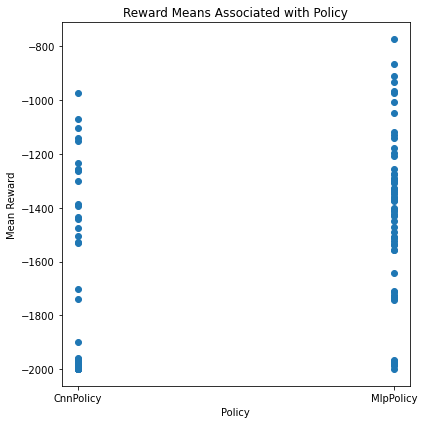

In [14]:
fighter_plots.plot_reward_mean(exp_run1, 'Policy')

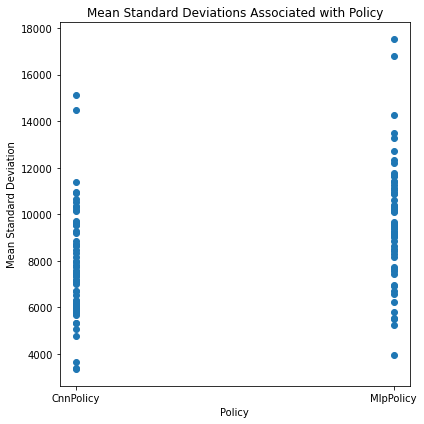

In [15]:
fighter_plots.plot_reward_std(exp_run1, 'Policy')

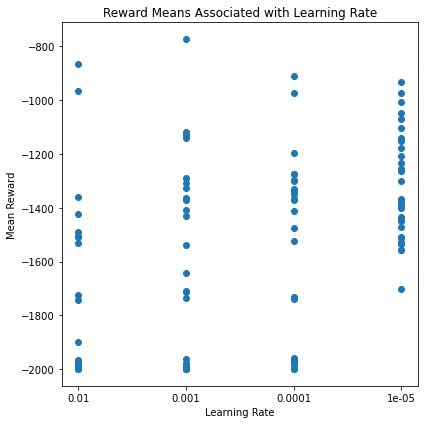

In [16]:
fighter_plots.plot_reward_mean(exp_run1, 'Learning Rate')

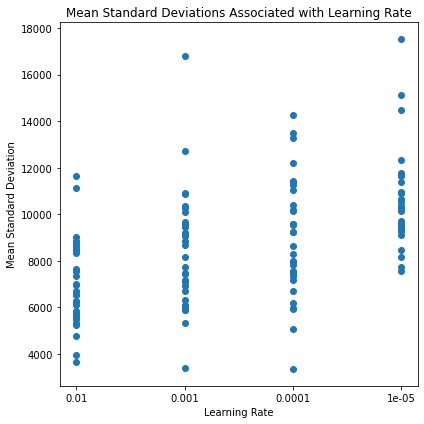

In [17]:
fighter_plots.plot_reward_std(exp_run1, 'Learning Rate')

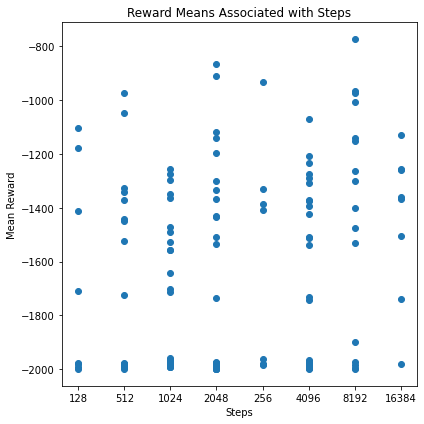

In [18]:
fighter_plots.plot_reward_mean(exp_run1, 'Steps')

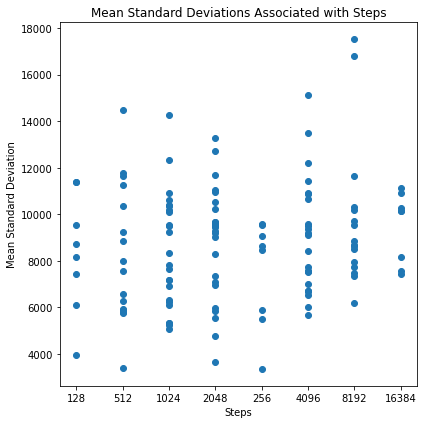

In [19]:
fighter_plots.plot_reward_std(exp_run1, 'Steps')

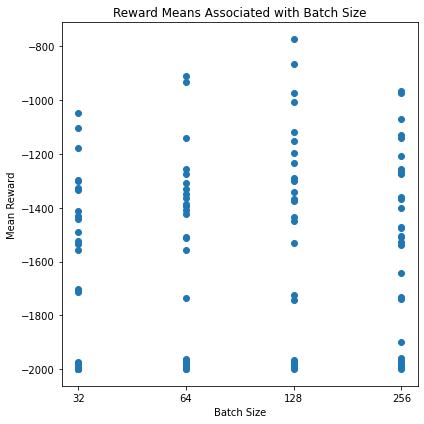

In [20]:
fighter_plots.plot_reward_mean(exp_run1, 'Batch Size')

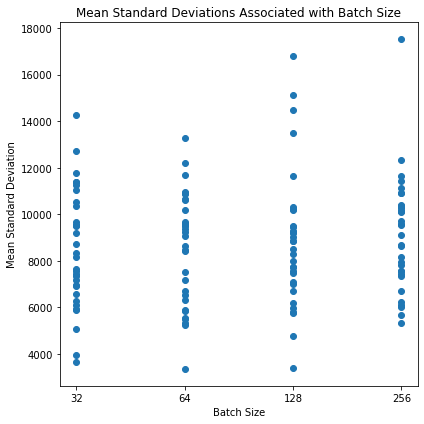

In [21]:
fighter_plots.plot_reward_std(exp_run1, 'Batch Size')

In [22]:
%store exp_run1

Stored 'exp_run1' (DataFrame)


In [23]:
%store -r exp_run1

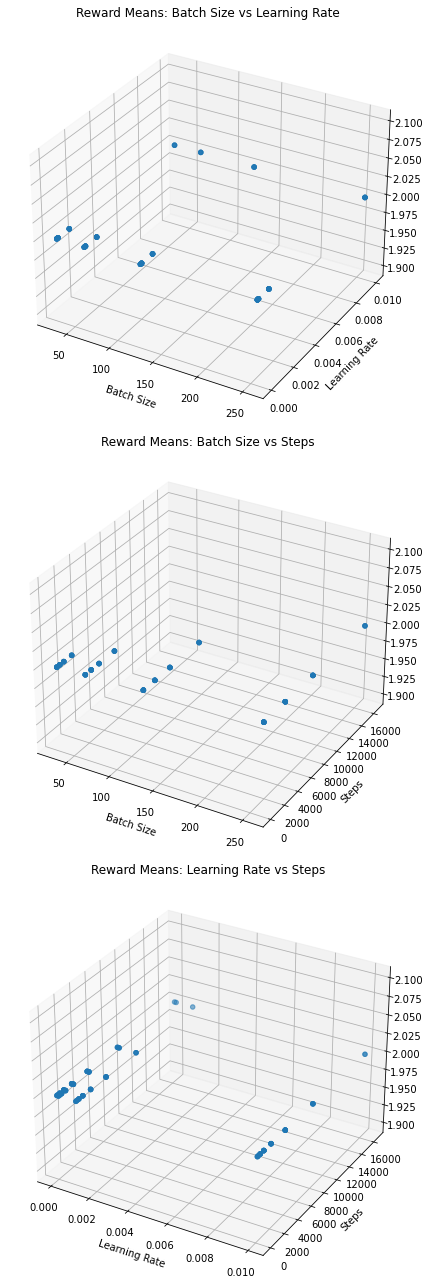

In [24]:
fighter_plots.plot_parameter_grid(exp_run1)

In [25]:
mlp_results = exp_run1[exp_run1['Policy'] == 'MlpPolicy']
mlp_i = np.argmax(mlp_results['Mean Reward'])
mlp_winner = mlp_results.iloc[mlp_i]
print("The MlpPolicy model with the highest reward mean, during 1st experiment, is:")
print(mlp_winner)

The MlpPolicy model with the highest reward mean, during 1st experiment, is:
Policy              MlpPolicy
Learning Rate           0.001
Steps                    8192
Batch Size                128
Seed                        2
Episode Rewards           NaN
Episode Stds              NaN
Mean Reward            -772.4
Std Mean              16814.6
Total Reward          -3862.0
Elapsed Time       327.467327
Name: 91, dtype: object


In [26]:
cnn_results = exp_run1[exp_run1['Policy'] == 'CnnPolicy']
cnn_i = np.argmax(cnn_results['Mean Reward'])
cnn_winner = cnn_results.iloc[cnn_i]
print("The CnnPolicy model with the highest reward mean, during 1st experiment, is:")
print(cnn_winner)

The CnnPolicy model with the highest reward mean, during 1st experiment, is:
Policy              CnnPolicy
Learning Rate         0.00001
Steps                     512
Batch Size                128
Seed                        2
Episode Rewards           NaN
Episode Stds              NaN
Mean Reward            -974.2
Std Mean              14490.6
Total Reward          -4871.0
Elapsed Time       296.124172
Name: 56, dtype: object


In [27]:
r2_models = np.array([np.array(mlp_winner), np.array(cnn_winner)])

## Hyperparameter Testing: Epochs, Gamma, Gae Lambda, and Clip Size

In [36]:
import gc

del models, archs
torch.cuda.empty_cache()
gc.collect()

537

In [37]:
Env.close()

In [ ]:
models = []
for policy_model in r2_models:
    policy = policy_model[0]
    learning_rate = policy_model[1]
    n_steps = policy_model[2]
    batch_size = policy_model[3]
    seed = int(policy_model[4])
    n_epochs = [10, 25, 50, 100]
    n_gamma = [0.9, 0.99, 0.999]
    n_gae_lambda = [0.95, 0.96, 0.97, 0.98, 0.99]
    n_clip_range = [0.1, 0.2, 0.3]    
    
    
    for epochs in n_epochs:
        for gamma in n_gamma:
            for gae_lambda in n_gae_lambda:
                for clip_range in n_clip_range:
                    models.append({"policy": policy, "learning_rate": learning_rate, 
                                   "n_steps": n_steps, "batch_size": batch_size, 'seed': 2,
                                   "n_epochs": epochs, "gamma": gamma, "gae_lambda": gae_lambda,
                                   "clip_range": clip_range})
total_timesteps = 50000
n_procs = 0
render_mode = None
count = 1
total = len(models)
archs = []
for model_options in models:
    Env = fighter_envs.make_env(fighter_envs.StreetFighter, n_procs, render_mode = render_mode) 
    print("------------")
    print(f'Starting architecture {count} of {total}')
    archs.append(fighter_envs.train_model(PPO, Env, model_options, total_timesteps))
    count+=1     
    Env.close()

Output()

------------
Starting architecture 1 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.95', '0.1', '[-748.0, -1949.0, -1932.0, -1625.0, -790.0]', '[8433, 5815, 5180, 13560, 8272]', '-1408.8', '8252.0', '-7044.0', '255.63396573066711'] at 4.260566095511119 minutes.
------------
Starting architecture 2 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.95', '0.2', '[-1940.0, -1552.0, -1971.0, -449.0, -1956.0]', '[5713, 12770, 5739, 17272, 6645]', '-1573.6', '9627.8', '-7868.0', '268.1044554710388'] at 4.46840759118398 minutes.
------------
Starting architecture 3 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.95', '0.3', '[-566.0, -1962.0, -1207.0, -1513.0, -1960.0]', '[16081, 6508, 29352, 11705, 5388]', '-1441.6', '13806.8', '-7208.0', '295.10092329978943'] at 4.918348721663157 minutes.
------------
Starting architecture 4 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.96', '0.1', '[-1516.0, -697.0, -1948.0, -689.0, -652.0]', '[10036, 7683, 7897, 7258, 16432]', '-1100.4', '9861.2', '-5502.0', '266.285786151886'] at 4.438096435864766 minutes.
------------
Starting architecture 5 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.96', '0.2', '[-1967.0, -726.0, -841.0, -1945.0, -788.0]', '[5212, 7850, 9016, 4869, 8983]', '-1253.4', '7186.0', '-6267.0', '241.2692551612854'] at 4.02115425268809 minutes.
------------
Starting architecture 6 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.96', '0.3', '[-1763.0, -759.0, -850.0, -865.0, -505.0]', '[11333, 7885, 8133, 9914, 12673]', '-948.4', '9987.6', '-4742.0', '261.7832832336426'] at 4.36305472056071 minutes.
------------
Starting architecture 7 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.97', '0.1', '[-762.0, -1892.0, -1956.0, -831.0, -1661.0]', '[7819, 10449, 6296, 7596, 11218]', '-1420.4', '8675.6', '-7102.0', '256.7673590183258'] at 4.279455983638764 minutes.
------------
Starting architecture 8 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.97', '0.2', '[-747.0, -440.0, -1579.0, -407.0, -798.0]', '[8585, 11941, 10883, 11496, 6838]', '-794.2', '9948.6', '-3971.0', '264.25558042526245'] at 4.404259673754374 minutes.
------------
Starting architecture 9 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.97', '0.3', '[-1726.0, -1786.0, -1365.0, -767.0, -488.0]', '[12716, 13989, 22855, 8309, 16080]', '-1226.4', '14789.8', '-6132.0', '311.5646755695343'] at 5.192744592825572 minutes.
------------
Starting architecture 10 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.98', '0.1', '[-356.0, -539.0, -780.0, -379.0, -581.0]', '[13658, 16609, 8391, 15499, 14212]', '-527.0', '13673.8', '-2635.0', '299.85660672187805'] at 4.997610112031301 minutes.
------------
Starting architecture 11 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.98', '0.2', '[-231.0, -1662.0, -424.0, -772.0, -1954.0]', '[11143, 12310, 25973, 9582, 6744]', '-1008.6', '13150.4', '-5043.0', '295.72220492362976'] at 4.928703415393829 minutes.
------------
Starting architecture 12 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.98', '0.3', '[-833.0, -658.0, -733.0, -1638.0, -815.0]', '[8662, 32912, 9064, 13136, 8953]', '-935.4', '14545.4', '-4677.0', '314.55267238616943'] at 5.242544539769491 minutes.
------------
Starting architecture 13 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.99', '0.1', '[-1667.0, -1953.0, -717.0, -1620.0, -837.0]', '[9708, 5102, 6839, 9633, 8140]', '-1358.8', '7884.4', '-6794.0', '242.2564561367035'] at 4.037607602278391 minutes.
------------
Starting architecture 14 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.99', '0.2', '[-1457.0, -1531.0, -709.0, -1636.0, -1939.0]', '[10125, 10992, 7572, 13927, 6794]', '-1454.4', '9882.0', '-7272.0', '260.78435349464417'] at 4.346405891577403 minutes.
------------
Starting architecture 15 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.9', '0.99', '0.3', '[-555.0, -1716.0, -1956.0, -1686.0, -1942.0]', '[17082, 13977, 6591, 12134, 6952]', '-1571.0', '11347.2', '-7855.0', '280.62314462661743'] at 4.677052410443624 minutes.
------------
Starting architecture 16 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.95', '0.1', '[-1958.0, -802.0, -702.0, -847.0, -1940.0]', '[6091, 7942, 8241, 10501, 6572]', '-1249.8', '7869.4', '-6249.0', '253.30062079429626'] at 4.2216770132382715 minutes.
------------
Starting architecture 17 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.95', '0.2', '[-869.0, -194.0, -752.0, -1348.0, -699.0]', '[9897, 47755, 9356, 9106, 7959]', '-772.4', '16814.6', '-3862.0', '329.9504041671753'] at 5.499173402786255 minutes.
------------
Starting architecture 18 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.95', '0.3', '[-1714.0, -1607.0, -1451.0, -1717.0, -666.0]', '[13360, 11323, 10056, 14346, 16928]', '-1431.0', '13202.6', '-7155.0', '302.7063639163971'] at 5.045106065273285 minutes.
------------
Starting architecture 19 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.96', '0.1', '[-1515.0, -1957.0, -1388.0, -851.0, -892.0]', '[10100, 5142, 20774, 8657, 8497]', '-1320.6', '10634.0', '-6603.0', '274.3154890537262'] at 4.5719248175621034 minutes.
------------
Starting architecture 20 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.96', '0.2', '[-1961.0, -1954.0, -1553.0, -1687.0, -1669.0]', '[5418, 5507, 14509, 15247, 9999]', '-1764.8', '10136.0', '-8824.0', '266.80802822113037'] at 4.446800470352173 minutes.
------------
Starting architecture 21 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.96', '0.3', '[-1941.0, -1586.0, -1940.0, -856.0, -857.0]', '[5136, 11605, 5658, 9099, 10379]', '-1436.0', '8375.4', '-7180.0', '251.02469444274902'] at 4.18374490737915 minutes.
------------
Starting architecture 22 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.97', '0.1', '[-911.0, -758.0, -737.0, -1949.0, -523.0]', '[9211, 8024, 8548, 8348, 13630]', '-975.6', '9552.2', '-4878.0', '262.42632937431335'] at 4.373772156238556 minutes.
------------
Starting architecture 23 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.97', '0.2', '[-1723.0, -1952.0, -785.0, -498.0, -531.0]', '[9741, 5459, 10103, 9818, 12234]', '-1097.8', '9471.0', '-5489.0', '262.8691303730011'] at 4.381152172883351 minutes.
------------
Starting architecture 24 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.97', '0.3', '[-712.0, -796.0, -730.0, -439.0, -1540.0]', '[8211, 8712, 8263, 15190, 14478]', '-843.4', '10970.8', '-4217.0', '275.4535517692566'] at 4.5908925294876095 minutes.
------------
Starting architecture 25 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.98', '0.1', '[-1475.0, -1951.0, -713.0, -1688.0, -102.0]', '[13455, 5586, 8284, 10588, 15362]', '-1185.8', '10655.0', '-5929.0', '279.6117932796478'] at 4.660196554660797 minutes.
------------
Starting architecture 26 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.98', '0.2', '[-737.0, -1956.0, -1566.0, -1713.0, -870.0]', '[7433, 6201, 12823, 10788, 8500]', '-1368.4', '9149.0', '-6842.0', '271.324179649353'] at 4.522069660822551 minutes.
------------
Starting architecture 27 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.98', '0.3', '[-390.0, -705.0, -820.0, -1588.0, -882.0]', '[15306, 18948, 7044, 12417, 8998]', '-877.0', '12542.6', '-4385.0', '289.111531496048'] at 4.818525524934133 minutes.
------------
Starting architecture 28 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.99', '0.1', '[-712.0, -558.0, -1953.0, -504.0, -370.0]', '[8710, 19694, 5727, 16780, 14016]', '-819.4', '12985.4', '-4097.0', '289.63426661491394'] at 4.827237776915232 minutes.
------------
Starting architecture 29 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.99', '0.2', '[-1928.0, -1947.0, -555.0, -1949.0, -1940.0]', '[5907, 6654, 13841, 7055, 6846]', '-1663.8', '8060.6', '-8319.0', '246.62536191940308'] at 4.110422698656718 minutes.
------------
Starting architecture 30 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.99', '0.99', '0.3', '[-431.0, -1971.0, -257.0, -1935.0, -1661.0]', '[15931, 5971, 14221, 5451, 11317]', '-1251.0', '10578.2', '-6255.0', '274.07411885261536'] at 4.567901980876923 minutes.
------------
Starting architecture 31 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.95', '0.1', '[-1556.0, -532.0, -797.0, -668.0, -776.0]', '[14930, 11659, 29133, 7428, 8940]', '-865.8', '14418.0', '-4329.0', '301.742214679718'] at 5.0290369113286335 minutes.
------------
Starting architecture 32 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.95', '0.2', '[-833.0, -242.0, -804.0, -1705.0, -1944.0]', '[7628, 12952, 8037, 10651, 5623]', '-1105.6', '8978.2', '-5528.0', '264.91368222236633'] at 4.415228037039439 minutes.
------------
Starting architecture 33 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.95', '0.3', '[-1624.0, -614.0, -1680.0, -809.0, -1945.0]', '[10585, 20147, 11941, 8580, 5292]', '-1334.4', '11309.0', '-6672.0', '277.1687161922455'] at 4.619478603204091 minutes.
------------
Starting architecture 34 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.96', '0.1', '[-1954.0, -515.0, -769.0, -793.0, -1582.0]', '[5041, 13077, 10663, 10845, 14090]', '-1122.6', '10743.2', '-5613.0', '275.99473428726196'] at 4.599912238121033 minutes.
------------
Starting architecture 35 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.96', '0.2', '[-1953.0, -1376.0, -1941.0, -630.0, -1687.0]', '[6441, 10231, 6419, 17086, 15612]', '-1517.4', '11157.8', '-7587.0', '287.220338344574'] at 4.7870056390762326 minutes.
------------
Starting architecture 36 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.96', '0.3', '[-1599.0, -1698.0, -815.0, -778.0, -438.0]', '[11077, 10362, 7395, 8676, 12782]', '-1065.6', '10058.4', '-5328.0', '268.09838795661926'] at 4.468306465943654 minutes.
------------
Starting architecture 37 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.97', '0.1', '[-1960.0, -878.0, -1948.0, -1589.0, -1545.0]', '[5179, 9267, 4923, 13618, 13819]', '-1584.0', '9361.2', '-7920.0', '259.63200521469116'] at 4.327200086911519 minutes.
------------
Starting architecture 38 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.97', '0.2', '[-1755.0, -798.0, -1423.0, -861.0, -783.0]', '[10571, 11949, 12483, 8404, 8231]', '-1124.0', '10327.6', '-5620.0', '268.22401309013367'] at 4.470400218168894 minutes.
------------
Starting architecture 39 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.97', '0.3', '[-802.0, -1950.0, -789.0, -1675.0, -1932.0]', '[10091, 7563, 8979, 15149, 5805]', '-1429.6', '9517.4', '-7148.0', '259.18421816825867'] at 4.319736969470978 minutes.
------------
Starting architecture 40 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.98', '0.1', '[-703.0, -1957.0, -479.0, -817.0, -839.0]', '[8689, 4918, 13922, 10069, 11577]', '-959.0', '9835.0', '-4795.0', '267.8156011104584'] at 4.463593351840973 minutes.
------------
Starting architecture 41 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.98', '0.2', '[-752.0, -880.0, -1959.0, -1655.0, -810.0]', '[9131, 9206, 5546, 10222, 9456]', '-1211.2', '8712.2', '-6056.0', '253.23892855644226'] at 4.220648809274038 minutes.
------------
Starting architecture 42 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.98', '0.3', '[-544.0, -1925.0, -887.0, -501.0, -1659.0]', '[14803, 6641, 9317, 18062, 13748]', '-1103.2', '12514.2', '-5516.0', '286.95070028305054'] at 4.782511671384175 minutes.
------------
Starting architecture 43 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.99', '0.1', '[-655.0, -684.0, -734.0, -712.0, -1935.0]', '[7570, 10136, 9165, 8385, 5287]', '-944.0', '8108.6', '-4720.0', '241.84803199768066'] at 4.030800533294678 minutes.
------------
Starting architecture 44 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.99', '0.2', '[-823.0, -1584.0, -350.0, -805.0, -1618.0]', '[8237, 12904, 15823, 9353, 14450]', '-1036.0', '12153.4', '-5180.0', '288.43903708457947'] at 4.807317284742991 minutes.
------------
Starting architecture 45 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '10', '0.999', '0.99', '0.3', '[-1705.0, -1948.0, -1938.0, -834.0, -1648.0]', '[14232, 6723, 7506, 9392, 9640]', '-1614.6', '9498.6', '-8073.0', '264.4485785961151'] at 4.407476309935252 minutes.
------------
Starting architecture 46 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.95', '0.1', '[-1921.0, -479.0, -1947.0, -1951.0, -1038.0]', '[5295, 13133, 5589, 6239, 24533]', '-1467.2', '10957.8', '-7336.0', '332.6982626914978'] at 5.544971044858297 minutes.
------------
Starting architecture 47 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.95', '0.2', '[-1948.0, -721.0, -722.0, -1600.0, -721.0]', '[6701, 7535, 8231, 12857, 8713]', '-1142.4', '8807.4', '-5712.0', '323.4689607620239'] at 5.391149346033732 minutes.
------------
Starting architecture 48 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.95', '0.3', '[-1629.0, -1639.0, -750.0, -580.0, -865.0]', '[11602, 14846, 8516, 17874, 9795]', '-1092.6', '12526.6', '-5463.0', '343.9085524082184'] at 5.73180920680364 minutes.
------------
Starting architecture 49 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.96', '0.1', '[-1730.0, -349.0, -1732.0, -1948.0, -399.0]', '[11356, 15816, 16366, 5034, 16334]', '-1231.6', '12981.2', '-6158.0', '350.6738119125366'] at 5.84456353187561 minutes.
------------
Starting architecture 50 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.96', '0.2', '[-1015.0, -404.0, -1935.0, -982.0, -779.0]', '[26945, 15823, 5345, 29706, 7680]', '-1023.0', '17099.8', '-5115.0', '381.8428044319153'] at 6.364046740531921 minutes.
------------
Starting architecture 51 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.96', '0.3', '[-1542.0, -843.0, -1449.0, -460.0, -1564.0]', '[12908, 9079, 18830, 12265, 10145]', '-1171.6', '12645.4', '-5858.0', '350.85646748542786'] at 5.847607791423798 minutes.
------------
Starting architecture 52 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.97', '0.1', '[-1936.0, -1591.0, -1950.0, -524.0, -416.0]', '[6980, 12924, 6175, 14036, 11723]', '-1283.4', '10367.6', '-6417.0', '326.98673009872437'] at 5.44977883497874 minutes.
------------
Starting architecture 53 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.97', '0.2', '[-807.0, -773.0, -1743.0, -548.0, -1585.0]', '[9542, 8465, 11044, 14193, 10316]', '-1091.2', '10712.0', '-5456.0', '326.92740392684937'] at 5.448790065447489 minutes.
------------
Starting architecture 54 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.97', '0.3', '[-737.0, -1925.0, -1566.0, -1642.0, -1716.0]', '[8503, 6485, 9275, 11549, 11263]', '-1517.2', '9415.0', '-7586.0', '318.7952036857605'] at 5.3132533947626746 minutes.
------------
Starting architecture 55 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.98', '0.1', '[-1722.0, -530.0, -1939.0, -1675.0, -839.0]', '[15255, 17232, 5698, 9959, 8520]', '-1341.0', '11332.8', '-6705.0', '336.5696904659271'] at 5.609494841098785 minutes.
------------
Starting architecture 56 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.98', '0.2', '[-1584.0, -1638.0, -1683.0, -1624.0, -857.0]', '[13804, 9022, 13729, 10088, 10500]', '-1477.2', '11428.6', '-7386.0', '338.10764813423157'] at 5.6351274689038595 minutes.
------------
Starting architecture 57 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.98', '0.3', '[-809.0, -1603.0, -856.0, -1755.0, -677.0]', '[9083, 10882, 9652, 12218, 16311]', '-1140.0', '11629.2', '-5700.0', '340.67765951156616'] at 5.677960991859436 minutes.
------------
Starting architecture 58 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.99', '0.1', '[-796.0, -1786.0, -1961.0, -1696.0, -1434.0]', '[7570, 12796, 5945, 10992, 8283]', '-1534.6', '9117.2', '-7673.0', '317.3634831905365'] at 5.2893913865089415 minutes.
------------
Starting architecture 59 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.99', '0.2', '[-1552.0, -821.0, -1623.0, -1967.0, -1754.0]', '[13985, 7318, 13111, 5096, 12858]', '-1543.4', '10473.6', '-7717.0', '322.68820786476135'] at 5.378136797746023 minutes.
------------
Starting architecture 60 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.9', '0.99', '0.3', '[-1944.0, -1548.0, -1953.0, -1655.0, -799.0]', '[6489, 11746, 5413, 12088, 8323]', '-1579.8', '8811.8', '-7899.0', '309.8889636993408'] at 5.164816061655681 minutes.
------------
Starting architecture 61 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.95', '0.1', '[-339.0, -1682.0, -1944.0, -1574.0, -817.0]', '[15639, 15883, 7238, 8971, 10403]', '-1271.2', '11626.8', '-6356.0', '338.5361256599426'] at 5.642268760999044 minutes.
------------
Starting architecture 62 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.95', '0.2', '[-542.0, -1714.0, -1924.0, -1544.0, -1942.0]', '[11337, 11291, 6120, 13345, 6654]', '-1533.2', '9749.4', '-7666.0', '332.2195644378662'] at 5.536992740631104 minutes.
------------
Starting architecture 63 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.95', '0.3', '[-1582.0, -798.0, -1918.0, -1629.0, -645.0]', '[12905, 7900, 6036, 11650, 6934]', '-1314.4', '9085.0', '-6572.0', '320.7448694705963'] at 5.345747824509939 minutes.
------------
Starting architecture 64 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.96', '0.1', '[-1623.0, -740.0, -725.0, -846.0, -697.0]', '[16775, 7516, 8974, 8593, 8330]', '-926.2', '10037.6', '-4631.0', '324.8754229545593'] at 5.414590382575989 minutes.
------------
Starting architecture 65 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.96', '0.2', '[-1625.0, -499.0, -1629.0, -1927.0, -1485.0]', '[12787, 12934, 13391, 6310, 15084]', '-1433.0', '12101.2', '-7165.0', '337.4572682380676'] at 5.6242878039677935 minutes.
------------
Starting architecture 66 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.96', '0.3', '[-480.0, -1699.0, -1470.0, -1654.0, -1670.0]', '[12674, 11083, 13568, 15644, 14655]', '-1394.6', '13524.8', '-6973.0', '351.9380052089691'] at 5.865633420149485 minutes.
------------
Starting architecture 67 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.97', '0.1', '[-778.0, -852.0, -1954.0, -733.0, -822.0]', '[7589, 9128, 6808, 7682, 7964]', '-1027.8', '7834.2', '-5139.0', '303.02452301979065'] at 5.050408716996511 minutes.
------------
Starting architecture 68 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.97', '0.2', '[-1629.0, -1688.0, -1969.0, -480.0, -174.0]', '[13584, 12108, 6128, 11824, 15056]', '-1188.0', '11740.0', '-5940.0', '324.8354947566986'] at 5.413924912611644 minutes.
------------
Starting architecture 69 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.97', '0.3', '[-775.0, -1751.0, -1270.0, -382.0, -693.0]', '[8442, 15168, 14152, 9729, 8978]', '-974.2', '11293.8', '-4871.0', '338.96273827552795'] at 5.649378971258799 minutes.
------------
Starting architecture 70 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.98', '0.1', '[-455.0, -842.0, -1585.0, -550.0, 368.0]', '[13548, 9349, 9262, 14447, 26999]', '-612.8', '14721.0', '-3064.0', '370.9514260292053'] at 6.182523767153422 minutes.
------------
Starting architecture 71 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.98', '0.2', '[-1938.0, -831.0, -1990.0, -1743.0, -468.0]', '[5203, 7627, 3773, 12120, 11870]', '-1394.0', '8118.6', '-6970.0', '307.17402744293213'] at 5.119567124048869 minutes.
------------
Starting architecture 72 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.98', '0.3', '[-1621.0, -1935.0, -636.0, -807.0, -700.0]', '[9290, 6050, 15350, 6940, 8229]', '-1139.8', '9171.8', '-5699.0', '316.6168124675751'] at 5.276946874459584 minutes.
------------
Starting architecture 73 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.99', '0.1', '[-504.0, -1504.0, -1647.0, -1948.0, -814.0]', '[13081, 11501, 12306, 5767, 7958]', '-1283.4', '10122.6', '-6417.0', '318.47240138053894'] at 5.3078733563423155 minutes.
------------
Starting architecture 74 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.99', '0.2', '[-1538.0, -690.0, -1599.0, -1571.0, -1611.0]', '[11586, 8555, 18297, 13424, 13716]', '-1401.8', '13115.6', '-7009.0', '347.8456540107727'] at 5.797427566846212 minutes.
------------
Starting architecture 75 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.99', '0.99', '0.3', '[-494.0, -1592.0, -1533.0, -434.0, -507.0]', '[13338, 9652, 14538, 11619, 15592]', '-912.0', '12947.8', '-4560.0', '344.628221988678'] at 5.743803699811299 minutes.
------------
Starting architecture 76 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.95', '0.1', '[-1965.0, -1659.0, -387.0, -1629.0, -416.0]', '[5095, 13441, 13520, 11912, 18233]', '-1211.2', '12440.2', '-6056.0', '350.8298993110657'] at 5.847164988517761 minutes.
------------
Starting architecture 77 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.95', '0.2', '[-1709.0, -1949.0, -794.0, -1938.0, -1673.0]', '[11990, 6783, 8451, 5653, 11194]', '-1612.6', '8814.2', '-8063.0', '312.35673427581787'] at 5.205945571263631 minutes.
------------
Starting architecture 78 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.95', '0.3', '[-1957.0, -415.0, -1937.0, -805.0, -703.0]', '[6317, 11798, 5884, 9032, 8926]', '-1163.4', '8391.4', '-5817.0', '312.9865605831146'] at 5.216442676385244 minutes.
------------
Starting architecture 79 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.96', '0.1', '[-1937.0, -1959.0, -1559.0, -1758.0, -825.0]', '[5912, 6032, 11169, 15097, 9115]', '-1607.6', '9465.0', '-8038.0', '312.05566787719727'] at 5.2009277979532875 minutes.
------------
Starting architecture 80 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.96', '0.2', '[-1947.0, -1955.0, -815.0, -1681.0, -463.0]', '[4717, 4979, 8921, 15102, 14200]', '-1372.2', '9583.8', '-6861.0', '320.8171696662903'] at 5.346952827771505 minutes.
------------
Starting architecture 81 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.96', '0.3', '[-1330.0, -683.0, -855.0, -678.0, -474.0]', '[10257, 8996, 8816, 7703, 14036]', '-804.0', '9961.6', '-4020.0', '317.59024453163147'] at 5.293170742193857 minutes.
------------
Starting architecture 82 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.97', '0.1', '[-1551.0, -1617.0, -1378.0, -1681.0, -1634.0]', '[13278, 10845, 9606, 17491, 9944]', '-1572.2', '12232.8', '-7861.0', '346.30574893951416'] at 5.771762482325236 minutes.
------------
Starting architecture 83 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.97', '0.2', '[-1702.0, -1931.0, -442.0, -1550.0, -1663.0]', '[12658, 6861, 11573, 9633, 11708]', '-1457.6', '10486.6', '-7288.0', '322.7748785018921'] at 5.379581308364868 minutes.
------------
Starting architecture 84 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.97', '0.3', '[-763.0, -764.0, -1720.0, -1698.0, -755.0]', '[8366, 8983, 11736, 16827, 7620]', '-1140.0', '10706.4', '-5700.0', '329.23386430740356'] at 5.48723107179006 minutes.
------------
Starting architecture 85 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.98', '0.1', '[-532.0, -387.0, -1924.0, -376.0, -473.0]', '[13288, 11272, 6204, 14962, 12106]', '-738.4', '11566.4', '-3692.0', '337.4911890029907'] at 5.624853150049845 minutes.
------------
Starting architecture 86 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.98', '0.2', '[-729.0, -747.0, -1911.0, -1573.0, -741.0]', '[8439, 7272, 8786, 12988, 8667]', '-1140.2', '9230.4', '-5701.0', '315.13555335998535'] at 5.252259222666423 minutes.
------------
Starting architecture 87 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.98', '0.3', '[-785.0, -763.0, -1720.0, -1572.0, -1092.0]', '[8952, 9393, 10857, 16001, 18806]', '-1186.4', '12801.8', '-5932.0', '343.9691119194031'] at 5.732818531990051 minutes.
------------
Starting architecture 88 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.99', '0.1', '[-739.0, -1669.0, -1954.0, -1703.0, -1656.0]', '[7538, 10857, 4623, 11741, 8998]', '-1544.2', '8751.4', '-7721.0', '312.4000129699707'] at 5.206666882832845 minutes.
------------
Starting architecture 89 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.99', '0.2', '[-1935.0, -349.0, -736.0, -1561.0, -437.0]', '[5978, 15553, 9694, 13264, 12282]', '-1003.6', '11354.2', '-5018.0', '327.0032365322113'] at 5.450053942203522 minutes.
------------
Starting architecture 90 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '25', '0.999', '0.99', '0.3', '[-457.0, -1318.0, -1622.0, -1712.0, -1950.0]', '[14812, 11921, 10024, 12541, 6041]', '-1411.8', '11067.8', '-7059.0', '326.5679044723511'] at 5.442798407872518 minutes.
------------
Starting architecture 91 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.95', '0.1', '[-211.0, -791.0, -799.0, -1661.0, -1970.0]', '[20812, 8979, 8763, 10851, 5253]', '-1086.4', '10931.6', '-5432.0', '419.3135018348694'] at 6.98855836391449 minutes.
------------
Starting architecture 92 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.95', '0.2', '[-764.0, -1488.0, -802.0, -1648.0, -1481.0]', '[8077, 11868, 7923, 15109, 12981]', '-1236.6', '11191.6', '-6183.0', '430.8305218219757'] at 7.180508697032929 minutes.
------------
Starting architecture 93 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.95', '0.3', '[-654.0, -724.0, -1569.0, -1617.0, -1668.0]', '[7856, 6214, 12971, 11722, 10248]', '-1246.4', '9802.2', '-6232.0', '430.57735204696655'] at 7.176289200782776 minutes.
------------
Starting architecture 94 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.96', '0.1', '[-1926.0, -1599.0, -805.0, -1949.0, -1628.0]', '[5505, 14826, 9720, 5358, 10157]', '-1581.4', '9113.2', '-7907.0', '418.5276119709015'] at 6.975460199515025 minutes.
------------
Starting architecture 95 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.96', '0.2', '[-803.0, -139.0, -1624.0, -1934.0, -1942.0]', '[8681, 14385, 10743, 5819, 6081]', '-1288.4', '9141.8', '-6442.0', '415.3246920108795'] at 6.922078200181326 minutes.
------------
Starting architecture 96 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.96', '0.3', '[-1766.0, -789.0, -1557.0, -1936.0, -558.0]', '[10878, 9726, 11956, 7353, 16287]', '-1321.2', '11240.0', '-6606.0', '421.1638660430908'] at 7.019397767384847 minutes.
------------
Starting architecture 97 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.97', '0.1', '[-1447.0, -1945.0, -1262.0, -758.0, -1688.0]', '[11880, 6800, 13205, 9174, 12644]', '-1420.0', '10740.6', '-7100.0', '418.6139717102051'] at 6.976899528503418 minutes.
------------
Starting architecture 98 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.97', '0.2', '[-580.0, -1926.0, -1561.0, -1405.0, -1588.0]', '[15757, 7779, 12170, 10123, 9110]', '-1412.0', '10987.8', '-7060.0', '415.60469222068787'] at 6.926744870344797 minutes.
------------
Starting architecture 99 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.97', '0.3', '[-1968.0, -1675.0, -1677.0, -782.0, -637.0]', '[6374, 16864, 8670, 7320, 15143]', '-1347.8', '10874.2', '-6739.0', '420.21653723716736'] at 7.0036089539527895 minutes.
------------
Starting architecture 100 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.98', '0.1', '[-1630.0, -1480.0, -742.0, -1633.0, -1941.0]', '[10506, 10745, 7834, 12877, 6188]', '-1485.2', '9630.0', '-7426.0', '403.8602261543274'] at 6.73100376923879 minutes.
------------
Starting architecture 101 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.98', '0.2', '[-1688.0, -759.0, -1964.0, -785.0, -1588.0]', '[10220, 33164, 6281, 6839, 12888]', '-1356.8', '13878.4', '-6784.0', '444.7376639842987'] at 7.412294399738312 minutes.
------------
Starting architecture 102 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.98', '0.3', '[-375.0, -846.0, -1682.0, -775.0, -1600.0]', '[16713, 9718, 12272, 7901, 11244]', '-1055.6', '11569.6', '-5278.0', '429.5730538368225'] at 7.159550897280375 minutes.
------------
Starting architecture 103 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.99', '0.1', '[-1939.0, -11.0, -1397.0, -1557.0, -662.0]', '[5554, 20656, 13454, 15640, 6835]', '-1113.2', '12427.8', '-5566.0', '445.37305092811584'] at 7.422884182135264 minutes.
------------
Starting architecture 104 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.99', '0.2', '[-1724.0, -1576.0, -1692.0, -759.0, -1465.0]', '[14896, 14121, 10504, 8799, 12992]', '-1443.2', '12262.4', '-7216.0', '439.33255910873413'] at 7.322209318478902 minutes.
------------
Starting architecture 105 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.9', '0.99', '0.3', '[-661.0, -168.0, -1691.0, -547.0, -530.0]', '[12410, 16102, 10922, 10941, 13307]', '-719.4', '12736.4', '-3597.0', '441.3801290988922'] at 7.356335484981537 minutes.
------------
Starting architecture 106 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.95', '0.1', '[-309.0, -721.0, -1615.0, -668.0, -1644.0]', '[24703, 8802, 12240, 7609, 11791]', '-991.4', '13029.0', '-4957.0', '443.3951828479767'] at 7.389919714132945 minutes.
------------
Starting architecture 107 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.95', '0.2', '[-1929.0, -1973.0, -742.0, -1955.0, -755.0]', '[5702, 4353, 8552, 5516, 9502]', '-1470.8', '6725.0', '-7354.0', '394.54415798187256'] at 6.575735966364543 minutes.
------------
Starting architecture 108 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.95', '0.3', '[-1705.0, -722.0, -1704.0, -1949.0, -1946.0]', '[12692, 16189, 14426, 5440, 5800]', '-1605.2', '10909.4', '-8026.0', '426.5605390071869'] at 7.1093423167864485 minutes.
------------
Starting architecture 109 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.96', '0.1', '[-744.0, -1943.0, -1138.0, -1561.0, -1636.0]', '[8552, 6632, 20666, 12913, 11281]', '-1404.4', '12008.8', '-7022.0', '442.2148485183716'] at 7.370247475306193 minutes.
------------
Starting architecture 110 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.96', '0.2', '[-722.0, -1935.0, -797.0, -1480.0, -1607.0]', '[7860, 5379, 9398, 10932, 13943]', '-1308.2', '9502.4', '-6541.0', '414.38935804367065'] at 6.906489300727844 minutes.
------------
Starting architecture 111 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.96', '0.3', '[-1933.0, -854.0, -778.0, -391.0, -1956.0]', '[6646, 9363, 8717, 15825, 4414]', '-1182.4', '8993.0', '-5912.0', '414.3339407444'] at 6.905565679073334 minutes.
------------
Starting architecture 112 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.97', '0.1', '[-1636.0, -1661.0, -720.0, -1679.0, -1935.0]', '[13712, 11028, 7622, 15278, 6901]', '-1526.2', '10908.2', '-7631.0', '425.11163878440857'] at 7.085193979740143 minutes.
------------
Starting architecture 113 of 360
Learning...


Output()

Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.97', '0.2', '[-727.0, -1535.0, -734.0, -1723.0, -1946.0]', '[9089, 14348, 9650, 12583, 6238]', '-1333.0', '10381.6', '-6665.0', '421.70304441452026'] at 7.028384073575338 minutes.
------------
Starting architecture 114 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.97', '0.3', '[-1950.0, -793.0, -405.0, -1932.0, -1939.0]', '[5800, 9275, 15346, 6493, 5680]', '-1403.8', '8518.8', '-7019.0', '404.1533856391907'] at 6.735889760653178 minutes.
------------
Starting architecture 115 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.98', '0.1', '[-826.0, -501.0, -1951.0, -380.0, -180.0]', '[10207, 16481, 4519, 15514, 12096]', '-767.6', '11763.4', '-3838.0', '431.2435555458069'] at 7.187392592430115 minutes.
------------
Starting architecture 116 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.98', '0.2', '[-1935.0, -1690.0, -389.0, -1653.0, -1980.0]', '[6242, 11844, 15481, 10750, 4684]', '-1529.4', '9800.2', '-7647.0', '419.11928391456604'] at 6.985321398576101 minutes.
------------
Starting architecture 117 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.98', '0.3', '[-726.0, -1923.0, -1628.0, -641.0, -836.0]', '[7985, 6610, 11725, 13896, 9852]', '-1150.8', '10013.6', '-5754.0', '424.59418845176697'] at 7.07656980752945 minutes.
------------
Starting architecture 118 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.99', '0.1', '[-1930.0, -1600.0, -1677.0, -654.0, -721.0]', '[5235, 14732, 12538, 17187, 8980]', '-1316.4', '11734.4', '-6582.0', '439.7648243904114'] at 7.32941373984019 minutes.
------------
Starting architecture 119 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.99', '0.2', '[-738.0, -758.0, -863.0, -1691.0, -1953.0]', '[8278, 9452, 8987, 9836, 6264]', '-1200.6', '8563.4', '-6003.0', '414.76062631607056'] at 6.912677105267843 minutes.
------------
Starting architecture 120 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.99', '0.99', '0.3', '[-680.0, -1605.0, -829.0, -1705.0, -831.0]', '[8034, 13309, 9178, 10597, 8832]', '-1130.0', '9990.0', '-5650.0', '423.631112575531'] at 7.060518542925517 minutes.
------------
Starting architecture 121 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.95', '0.1', '[-1722.0, -863.0, -1635.0, -327.0, -1758.0]', '[13441, 8683, 14713, 12604, 13084]', '-1261.0', '12505.0', '-6305.0', '443.3152482509613'] at 7.388587470849355 minutes.
------------
Starting architecture 122 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.95', '0.2', '[-1949.0, -1655.0, -1140.0, -567.0, -836.0]', '[6713, 11008, 21522, 12171, 9257]', '-1229.4', '12134.2', '-6147.0', '430.4965035915375'] at 7.174941726525625 minutes.
------------
Starting architecture 123 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.95', '0.3', '[-440.0, -782.0, -1751.0, -1934.0, -1959.0]', '[13035, 29378, 16501, 5534, 4916]', '-1373.2', '13872.8', '-6866.0', '455.2394106388092'] at 7.58732351064682 minutes.
------------
Starting architecture 124 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.96', '0.1', '[-1676.0, -734.0, -1812.0, -1970.0, -1938.0]', '[17552, 9231, 14814, 4759, 6369]', '-1626.0', '10545.0', '-8130.0', '420.19107151031494'] at 7.003184525171916 minutes.
------------
Starting architecture 125 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.96', '0.2', '[-1623.0, -841.0, -1788.0, -862.0, -700.0]', '[14155, 11329, 11655, 9180, 9214]', '-1162.8', '11106.6', '-5814.0', '429.28217577934265'] at 7.154702929655711 minutes.
------------
Starting architecture 126 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.96', '0.3', '[-1788.0, -721.0, -816.0, -1936.0, -1626.0]', '[11945, 8658, 10873, 7603, 12879]', '-1377.4', '10391.6', '-6887.0', '425.2480847835541'] at 7.087468079725901 minutes.
------------
Starting architecture 127 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.97', '0.1', '[-1646.0, -638.0, -522.0, -828.0, -712.0]', '[12488, 18802, 15007, 8271, 8529]', '-869.2', '12619.4', '-4346.0', '442.88958287239075'] at 7.381493047873179 minutes.
------------
Starting architecture 128 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.97', '0.2', '[-803.0, -844.0, -1322.0, -1947.0, -781.0]', '[8489, 9993, 12805, 6324, 7481]', '-1139.4', '9018.4', '-5697.0', '411.98720049858093'] at 6.866453341643015 minutes.
------------
Starting architecture 129 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.97', '0.3', '[-1621.0, -508.0, -780.0, -711.0, -784.0]', '[10948, 13290, 8847, 8016, 6346]', '-880.8', '9489.4', '-4404.0', '415.3354477882385'] at 6.922257463137309 minutes.
------------
Starting architecture 130 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.98', '0.1', '[-549.0, -1786.0, -831.0, -400.0, -545.0]', '[15983, 12009, 10582, 15563, 14656]', '-822.2', '13758.6', '-4111.0', '451.0081012248993'] at 7.516801687081655 minutes.
------------
Starting architecture 131 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.98', '0.2', '[-1324.0, -1694.0, -342.0, -1541.0, -1588.0]', '[10385, 10403, 11757, 14532, 13160]', '-1297.8', '12047.4', '-6489.0', '437.3832666873932'] at 7.289721111456553 minutes.
------------
Starting architecture 132 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.98', '0.3', '[-1720.0, -857.0, -1704.0, -1606.0, -363.0]', '[10581, 10435, 8719, 14339, 12904]', '-1250.0', '11395.6', '-6250.0', '429.9202013015747'] at 7.165336688359578 minutes.
------------
Starting architecture 133 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.99', '0.1', '[-1685.0, -1961.0, -1550.0, -735.0, -1938.0]', '[10357, 6125, 12532, 7454, 7615]', '-1573.8', '8816.6', '-7869.0', '411.96991419792175'] at 6.866165236632029 minutes.
------------
Starting architecture 134 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.99', '0.2', '[-1678.0, -554.0, -131.0, -1947.0, -805.0]', '[12555, 16783, 13381, 5411, 8701]', '-1023.0', '11366.2', '-5115.0', '431.1331169605255'] at 7.185551949342092 minutes.
------------
Starting architecture 135 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '50', '0.999', '0.99', '0.3', '[-1249.0, -1620.0, -555.0, -1941.0, -1948.0]', '[12200, 10073, 15062, 5253, 6237]', '-1462.6', '9765.0', '-7313.0', '421.89039397239685'] at 7.031506566206614 minutes.
------------
Starting architecture 136 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.95', '0.1', '[-538.0, -1955.0, -719.0, -760.0, -1660.0]', '[13338, 6024, 7127, 8878, 14154]', '-1126.4', '9904.2', '-5632.0', '607.3354969024658'] at 10.122258281707763 minutes.
------------
Starting architecture 137 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.95', '0.2', '[-1955.0, -1319.0, -1392.0, -1709.0, -1956.0]', '[5354, 21896, 19018, 13554, 5030]', '-1666.2', '12970.4', '-8331.0', '647.7505548000336'] at 10.79584258000056 minutes.
------------
Starting architecture 138 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.95', '0.3', '[-1777.0, -795.0, -1933.0, -1660.0, -495.0]', '[14848, 9614, 6031, 11244, 6568]', '-1332.0', '9661.0', '-6660.0', '593.8981747627258'] at 9.898302912712097 minutes.
------------
Starting architecture 139 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.96', '0.1', '[-739.0, -239.0, -1610.0, -854.0, -1695.0]', '[8682, 14199, 12544, 8342, 14515]', '-1027.4', '11656.4', '-5137.0', '619.4514110088348'] at 10.32419018348058 minutes.
------------
Starting architecture 140 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.96', '0.2', '[-758.0, -861.0, -1720.0, -698.0, -1757.0]', '[10463, 11145, 14410, 8957, 13290]', '-1158.8', '11653.0', '-5794.0', '612.4431006908417'] at 10.207385011514027 minutes.
------------
Starting architecture 141 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.96', '0.3', '[-124.0, 129.0, -1637.0, -462.0, -537.0]', '[21446, 30176, 11124, 12727, 7177]', '-526.2', '16530.0', '-2631.0', '655.3544311523438'] at 10.922573852539063 minutes.
------------
Starting architecture 142 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.97', '0.1', '[-1960.0, -1624.0, -1960.0, -1934.0, -812.0]', '[6609, 9624, 5123, 6180, 11713]', '-1658.0', '7849.8', '-8290.0', '580.3158657550812'] at 9.67193109591802 minutes.
------------
Starting architecture 143 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.97', '0.2', '[-1960.0, -1698.0, -1637.0, -828.0, -1934.0]', '[5126, 11766, 8735, 8915, 7029]', '-1611.4', '8314.2', '-8057.0', '585.788092136383'] at 9.763134868939717 minutes.
------------
Starting architecture 144 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.97', '0.3', '[-1798.0, -1930.0, -1548.0, -754.0, -1530.0]', '[16548, 9068, 13945, 7457, 14807]', '-1512.0', '12365.0', '-7560.0', '620.1328620910645'] at 10.335547701517742 minutes.
------------
Starting architecture 145 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.98', '0.1', '[-1953.0, -1572.0, -800.0, -735.0, -1532.0]', '[5136, 11250, 10308, 8828, 15563]', '-1318.4', '10217.0', '-6592.0', '603.1662847995758'] at 10.052771413326264 minutes.
------------
Starting architecture 146 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.98', '0.2', '[-1606.0, -848.0, -826.0, -309.0, -598.0]', '[10581, 9300, 9023, 26899, 14595]', '-837.4', '14079.6', '-4187.0', '627.9442446231842'] at 10.465737410386403 minutes.
------------
Starting architecture 147 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.98', '0.3', '[-543.0, -1944.0, -701.0, -776.0, -1465.0]', '[16739, 5306, 10327, 13001, 12628]', '-1085.8', '11600.2', '-5429.0', '616.6409194469452'] at 10.277348657449087 minutes.
------------
Starting architecture 148 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.99', '0.1', '[-1664.0, -868.0, -1551.0, -1489.0, -1938.0]', '[14745, 10629, 12551, 11416, 5640]', '-1502.0', '10996.2', '-7510.0', '602.438056230545'] at 10.040634270509084 minutes.
------------
Starting architecture 149 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.99', '0.2', '[-1970.0, -1736.0, -838.0, -1597.0, -907.0]', '[6643, 15692, 8407, 15471, 9649]', '-1409.6', '11172.4', '-7048.0', '605.5936284065247'] at 10.093227140108745 minutes.
------------
Starting architecture 150 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.9', '0.99', '0.3', '[-485.0, -1962.0, -519.0, -1939.0, -836.0]', '[13553, 6568, 7890, 5100, 10541]', '-1148.2', '8730.4', '-5741.0', '591.2239608764648'] at 9.853732681274414 minutes.
------------
Starting architecture 151 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.95', '0.1', '[-1693.0, -1955.0, -1971.0, -682.0, -1629.0]', '[11087, 6840, 4747, 9139, 12623]', '-1586.0', '8887.2', '-7930.0', '595.2147834300995'] at 9.920246390501658 minutes.
------------
Starting architecture 152 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.95', '0.2', '[-1945.0, -1935.0, -1763.0, -709.0, -1524.0]', '[7104, 6045, 14484, 8534, 13806]', '-1575.2', '9994.6', '-7876.0', '598.7128949165344'] at 9.978548248608908 minutes.
------------
Starting architecture 153 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.95', '0.3', '[-1944.0, -714.0, -1733.0, -720.0, -1530.0]', '[6619, 7412, 15493, 9423, 13763]', '-1328.2', '10542.0', '-6641.0', '602.0264024734497'] at 10.033773374557494 minutes.
------------
Starting architecture 154 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.96', '0.1', '[-760.0, -227.0, -875.0, -765.0, -825.0]', '[9115, 13836, 9447, 8341, 8947]', '-690.4', '9937.2', '-3452.0', '602.3082025051117'] at 10.03847004175186 minutes.
------------
Starting architecture 155 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.96', '0.2', '[-374.0, -1570.0, -1261.0, -755.0, -1668.0]', '[36868, 13220, 12338, 7897, 10661]', '-1125.6', '16196.8', '-5628.0', '657.2682108879089'] at 10.95447018146515 minutes.
------------
Starting architecture 156 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.96', '0.3', '[-1954.0, -1682.0, -1939.0, -518.0, -772.0]', '[6237, 15523, 6727, 5777, 8913]', '-1373.0', '8635.4', '-6865.0', '595.8820962905884'] at 9.931368271509806 minutes.
------------
Starting architecture 157 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.97', '0.1', '[-1746.0, -1941.0, -1945.0, -868.0, -1715.0]', '[10344, 4911, 6350, 8126, 11797]', '-1643.0', '8305.6', '-8215.0', '587.0973522663116'] at 9.784955871105193 minutes.
------------
Starting architecture 158 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.97', '0.2', '[-1933.0, 343.0, -1936.0, -1656.0, -1931.0]', '[7004, 40523, 6303, 13691, 4547]', '-1422.6', '14413.6', '-7113.0', '628.5558540821075'] at 10.475930901368459 minutes.
------------
Starting architecture 159 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.97', '0.3', '[-1947.0, -1601.0, -1956.0, -1519.0, -1947.0]', '[6111, 10140, 5949, 10638, 7538]', '-1794.0', '8075.2', '-8970.0', '587.7286558151245'] at 9.795477596918742 minutes.
------------
Starting architecture 160 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.98', '0.1', '[-1964.0, -1964.0, -1622.0, -799.0, -1695.0]', '[6138, 6041, 10596, 9617, 13415]', '-1608.8', '9161.4', '-8044.0', '594.873174905777'] at 9.914552915096284 minutes.
------------
Starting architecture 161 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.98', '0.2', '[-1951.0, -1557.0, -1942.0, -445.0, -804.0]', '[4771, 13260, 7052, 15062, 9216]', '-1339.8', '9872.2', '-6699.0', '603.6151216030121'] at 10.060252026716869 minutes.
------------
Starting architecture 162 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.98', '0.3', '[-1642.0, -776.0, -1590.0, -720.0, -1923.0]', '[11283, 9318, 9584, 7390, 5944]', '-1330.2', '8703.8', '-6651.0', '592.672914981842'] at 9.877881916364034 minutes.
------------
Starting architecture 163 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.99', '0.1', '[-1721.0, -1668.0, -1958.0, -1710.0, -729.0]', '[10892, 13522, 6502, 12844, 8862]', '-1557.2', '10524.4', '-7786.0', '606.913476228714'] at 10.1152246038119 minutes.
------------
Starting architecture 164 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.99', '0.2', '[-735.0, -807.0, -1544.0, -1479.0, -844.0]', '[8846, 9970, 14614, 14487, 8447]', '-1081.8', '11272.8', '-5409.0', '618.1556115150452'] at 10.302593525250753 minutes.
------------
Starting architecture 165 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.99', '0.99', '0.3', '[-1508.0, -1971.0, -1940.0, -1406.0, -820.0]', '[9727, 5957, 5966, 21403, 10338]', '-1529.0', '10678.2', '-7645.0', '617.1816673278809'] at 10.286361122131348 minutes.
------------
Starting architecture 166 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.95', '0.1', '[-1667.0, -254.0, -377.0, -509.0, -1591.0]', '[14429, 14737, 15553, 12815, 14806]', '-879.6', '14468.0', '-4398.0', '641.915899515152'] at 10.698598325252533 minutes.
------------
Starting architecture 167 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.95', '0.2', '[-1920.0, -1675.0, -1580.0, -1622.0, -1765.0]', '[6437, 10236, 13819, 12548, 11845]', '-1712.4', '10977.0', '-8562.0', '613.8064634799957'] at 10.230107724666595 minutes.
------------
Starting architecture 168 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.95', '0.3', '[-868.0, -824.0, -1944.0, -1455.0, -1956.0]', '[10210, 9695, 6786, 11222, 6866]', '-1409.4', '8955.8', '-7047.0', '593.0599482059479'] at 9.884332470099132 minutes.
------------
Starting architecture 169 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.96', '0.1', '[-1461.0, -745.0, -1688.0, -346.0, -734.0]', '[14364, 8475, 13405, 15019, 8177]', '-994.8', '11888.0', '-4974.0', '617.3457984924316'] at 10.289096641540528 minutes.
------------
Starting architecture 170 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.96', '0.2', '[-735.0, -1939.0, -679.0, -1930.0, -1698.0]', '[8100, 6294, 8477, 5885, 16090]', '-1396.2', '8969.2', '-6981.0', '601.2242395877838'] at 10.02040399312973 minutes.
------------
Starting architecture 171 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.96', '0.3', '[-842.0, -1934.0, -1946.0, -789.0, -1956.0]', '[8962, 6452, 6659, 9369, 6143]', '-1493.4', '7517.0', '-7467.0', '588.2242107391357'] at 9.803736845652262 minutes.
------------
Starting architecture 172 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.97', '0.1', '[-833.0, -1728.0, -1481.0, -1575.0, -1613.0]', '[9192, 15443, 11940, 11741, 12542]', '-1446.0', '12171.6', '-7230.0', '623.200190782547'] at 10.386669846375783 minutes.
------------
Starting architecture 173 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.97', '0.2', '[-690.0, -1716.0, -1593.0, -1928.0, -1623.0]', '[6438, 10891, 12832, 9194, 9660]', '-1510.0', '9803.0', '-7550.0', '606.5494039058685'] at 10.109156731764475 minutes.
------------
Starting architecture 174 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.97', '0.3', '[-706.0, -860.0, -834.0, -1782.0, -1633.0]', '[6492, 11024, 10734, 14713, 15081]', '-1163.0', '11608.8', '-5815.0', '621.6265671253204'] at 10.360442785422007 minutes.
------------
Starting architecture 175 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.98', '0.1', '[-460.0, -529.0, -1834.0, -452.0, -789.0]', '[12417, 18108, 12062, 12182, 9213]', '-812.8', '12796.4', '-4064.0', '630.1336965560913'] at 10.502228275934856 minutes.
------------
Starting architecture 176 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.98', '0.2', '[-1561.0, -1964.0, -824.0, -1516.0, -1950.0]', '[14174, 4951, 10436, 12025, 5599]', '-1563.0', '9437.0', '-7815.0', '600.033744096756'] at 10.0005624016126 minutes.
------------
Starting architecture 177 of 360
Learning...


Evaluating...
finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.98', '0.3', '[-1722.0, -1784.0, -1742.0, -1630.0, -1960.0]', '[12343, 16130, 12851, 14475, 6017]', '-1767.6', '12363.2', '-8838.0', '626.8220756053925'] at 10.447034593423208 minutes.
------------
Starting architecture 178 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.99', '0.1', '[-798.0, -1706.0, -146.0, -1929.0, -698.0]', '[7398, 12379, 19468, 6302, 7768]', '-1055.4', '10663.0', '-5277.0', '609.8811769485474'] at 10.16468628247579 minutes.
------------
Starting architecture 179 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.99', '0.2', '[-831.0, -686.0, -646.0, -1949.0, -841.0]', '[8746, 7667, 8162, 6573, 9682]', '-990.6', '8166.0', '-4953.0', '584.9248678684235'] at 9.748747797807058 minutes.
------------
Starting architecture 180 of 360
Learning...


Evaluating...


Output()

finished architecture ['MlpPolicy', '0.001', '8192', '128', '2', '100', '0.999', '0.99', '0.3', '[-741.0, -1650.0, -877.0, -420.0, -821.0]', '[7581, 11328, 8959, 14254, 9887]', '-901.8', '10401.8', '-4509.0', '605.7671868801117'] at 10.096119781335195 minutes.
------------
Starting architecture 181 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.95', '0.1', '[-891.0, -1567.0, -1592.0, -1948.0, -1461.0]', '[8365, 14699, 14259, 5790, 11318]', '-1491.8', '10886.2', '-7459.0', '259.4734618663788'] at 4.324557697772979 minutes.
------------
Starting architecture 182 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.95', '0.2', '[-1937.0, -1935.0, -1473.0, -734.0, -1595.0]', '[5878, 6306, 11823, 9894, 10998]', '-1534.8', '8979.8', '-7674.0', '243.3736436367035'] at 4.056227393945059 minutes.
------------
Starting architecture 183 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.95', '0.3', '[-1700.0, -1597.0, -1626.0, -1172.0, -1877.0]', '[12018, 13787, 10738, 17309, 10343]', '-1594.4', '12839.0', '-7972.0', '284.4469177722931'] at 4.7407819628715515 minutes.
------------
Starting architecture 184 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.96', '0.1', '[-231.0, -792.0, -1487.0, -749.0, -675.0]', '[16632, 8033, 9599, 10589, 8073]', '-786.8', '10585.2', '-3934.0', '265.05209946632385'] at 4.417534991105398 minutes.
------------
Starting architecture 185 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.96', '0.2', '[-1656.0, -810.0, -1975.0, 117.0, -1531.0]', '[11646, 11050, 5427, 28287, 12625]', '-1171.0', '13807.0', '-5855.0', '287.66881704330444'] at 4.794480284055074 minutes.
------------
Starting architecture 186 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.96', '0.3', '[-1642.0, -778.0, -1617.0, -828.0, -372.0]', '[9506, 8308, 14400, 9277, 12184]', '-1047.4', '10735.0', '-5237.0', '267.5118525028229'] at 4.458530875047048 minutes.
------------
Starting architecture 187 of 360
Learning...


Evaluating...
finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.97', '0.1', '[-1617.0, -580.0, -1506.0, -1937.0, -1470.0]', '[10578, 15238, 11617, 6342, 13303]', '-1422.0', '11415.6', '-7110.0', '269.56432032585144'] at 4.492738672097524 minutes.
------------
Starting architecture 188 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.97', '0.2', '[-1715.0, -1725.0, -1648.0, -1807.0, -800.0]', '[12723, 14934, 12922, 12162, 9917]', '-1539.0', '12531.6', '-7695.0', '284.9931559562683'] at 4.749885932604472 minutes.
------------
Starting architecture 189 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.97', '0.3', '[-1954.0, -780.0, -14.0, -1648.0, -764.0]', '[4609, 7997, 10124, 12752, 7573]', '-1032.0', '8611.0', '-5160.0', '241.85697031021118'] at 4.030949505170186 minutes.
------------
Starting architecture 190 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.98', '0.1', '[-789.0, -795.0, -700.0, -1973.0, -1506.0]', '[10296, 8540, 8320, 6158, 11843]', '-1152.6', '9031.4', '-5763.0', '254.36112761497498'] at 4.239352126916249 minutes.
------------
Starting architecture 191 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.98', '0.2', '[-854.0, -812.0, -679.0, -1689.0, -725.0]', '[7906, 8432, 8175, 15173, 7555]', '-951.8', '9448.2', '-4759.0', '265.79347467422485'] at 4.429891244570414 minutes.
------------
Starting architecture 192 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.98', '0.3', '[-686.0, -1949.0, -686.0, -1450.0, -1623.0]', '[6938, 5173, 11682, 11912, 12472]', '-1278.8', '9635.4', '-6394.0', '260.27797293663025'] at 4.337966215610504 minutes.
------------
Starting architecture 193 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.99', '0.1', '[-1647.0, -1131.0, -1515.0, -508.0, -390.0]', '[13934, 30612, 12739, 15444, 18330]', '-1038.2', '18211.8', '-5191.0', '340.6118972301483'] at 5.676864953835805 minutes.
------------
Starting architecture 194 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.99', '0.2', '[-1602.0, -1931.0, -1955.0, -1806.0, -736.0]', '[13359, 6638, 5960, 13027, 7223]', '-1606.0', '9241.4', '-8030.0', '253.42335772514343'] at 4.22372262875239 minutes.
------------
Starting architecture 195 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.9', '0.99', '0.3', '[-1702.0, -1728.0, -790.0, -1761.0, -206.0]', '[10400, 11599, 9121, 15132, 14496]', '-1237.4', '12149.6', '-6187.0', '273.10880303382874'] at 4.551813383897145 minutes.
------------
Starting architecture 196 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.95', '0.1', '[-430.0, -733.0, -1930.0, -400.0, -1933.0]', '[12835, 8315, 6123, 12993, 6364]', '-1085.2', '9326.0', '-5426.0', '242.70409393310547'] at 4.045068232218425 minutes.
------------
Starting architecture 197 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.95', '0.2', '[-466.0, -807.0, -1249.0, -1575.0, -774.0]', '[15333, 10038, 21335, 17043, 8704]', '-974.2', '14490.6', '-4871.0', '296.80967688560486'] at 4.946827948093414 minutes.
------------
Starting architecture 198 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.95', '0.3', '[-533.0, -866.0, -1937.0, -1638.0, -761.0]', '[14468, 8421, 7295, 11142, 6077]', '-1147.0', '9480.6', '-5735.0', '253.63954877853394'] at 4.2273258129755655 minutes.
------------
Starting architecture 199 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.96', '0.1', '[-1578.0, -1665.0, -1520.0, -575.0, -557.0]', '[10935, 12438, 9768, 14006, 15824]', '-1179.0', '12594.2', '-5895.0', '280.91325211524963'] at 4.681887535254161 minutes.
------------
Starting architecture 200 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.96', '0.2', '[-1974.0, -805.0, -1969.0, -771.0, -1671.0]', '[5610, 7645, 5734, 7517, 16754]', '-1438.0', '8652.0', '-7190.0', '240.12096905708313'] at 4.002016150951386 minutes.
------------
Starting architecture 201 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.96', '0.3', '[-1570.0, -819.0, -692.0, -756.0, -153.0]', '[11885, 8103, 9315, 8466, 19816]', '-798.0', '11517.0', '-3990.0', '278.6293396949768'] at 4.643822328249613 minutes.
------------
Starting architecture 202 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.97', '0.1', '[-773.0, -1581.0, -857.0, -716.0, -1959.0]', '[10119, 13804, 8715, 7534, 6577]', '-1177.2', '9349.8', '-5886.0', '251.03368282318115'] at 4.183894713719686 minutes.
------------
Starting architecture 203 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.97', '0.2', '[-1938.0, -1930.0, -367.0, -542.0, -1635.0]', '[5217, 6387, 13277, 18167, 12061]', '-1282.4', '11021.8', '-6412.0', '267.9293382167816'] at 4.465488970279694 minutes.
------------
Starting architecture 204 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.97', '0.3', '[-1587.0, -1778.0, -878.0, -1956.0, -1950.0]', '[13537, 13110, 8523, 4250, 5113]', '-1629.8', '8906.6', '-8149.0', '248.39649486541748'] at 4.139941581090292 minutes.
------------
Starting architecture 205 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.98', '0.1', '[-405.0, -825.0, -1609.0, -1591.0, -398.0]', '[12095, 8343, 13762, 16556, 16305]', '-965.6', '13412.2', '-4828.0', '297.29374647140503'] at 4.9548957745234175 minutes.
------------
Starting architecture 206 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.98', '0.2', '[-1535.0, -754.0, -1597.0, -338.0, -1936.0]', '[10144, 8382, 12984, 12565, 7849]', '-1232.0', '10384.8', '-6160.0', '265.8082227706909'] at 4.430137046178182 minutes.
------------
Starting architecture 207 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.98', '0.3', '[-569.0, -1725.0, -881.0, -1704.0, -1934.0]', '[13223, 14094, 9103, 10449, 5429]', '-1362.6', '10459.6', '-6813.0', '263.1425623893738'] at 4.38570937315623 minutes.
------------
Starting architecture 208 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.99', '0.1', '[-1731.0, -685.0, -1621.0, -1931.0, -1965.0]', '[15120, 8660, 14300, 6187, 5236]', '-1586.6', '9900.6', '-7933.0', '263.25008034706116'] at 4.387501339117686 minutes.
------------
Starting architecture 209 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.99', '0.2', '[-837.0, -1939.0, -589.0, -1601.0, -1929.0]', '[9237, 5930, 15976, 12615, 6167]', '-1379.0', '9985.0', '-6895.0', '253.6339271068573'] at 4.227232118447621 minutes.
------------
Starting architecture 210 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.99', '0.99', '0.3', '[-1641.0, -1481.0, -1960.0, -522.0, -624.0]', '[10290, 10531, 5757, 14311, 17147]', '-1245.6', '11607.2', '-6228.0', '270.7778651714325'] at 4.5129644195238745 minutes.
------------
Starting architecture 211 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.95', '0.1', '[-562.0, -1950.0, -1796.0, -795.0, -1952.0]', '[14420, 5810, 12251, 10450, 4763]', '-1411.0', '9538.8', '-7055.0', '253.9502260684967'] at 4.232503767808279 minutes.
------------
Starting architecture 212 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.95', '0.2', '[-1546.0, -837.0, -1938.0, -1960.0, -1778.0]', '[9811, 9184, 4259, 5033, 13017]', '-1611.8', '8260.8', '-8059.0', '234.567617893219'] at 3.9094602982203166 minutes.
------------
Starting architecture 213 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.95', '0.3', '[-1532.0, -1429.0, -1904.0, -1631.0, -861.0]', '[10363, 9612, 9242, 14124, 8664]', '-1471.4', '10401.0', '-7357.0', '257.58884596824646'] at 4.2931474328041075 minutes.
------------
Starting architecture 214 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.96', '0.1', '[-1946.0, -1570.0, -844.0, -1698.0, -1947.0]', '[5839, 14528, 10225, 14624, 6831]', '-1601.0', '10409.4', '-8005.0', '259.93780303001404'] at 4.3322967171669005 minutes.
------------
Starting architecture 215 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.96', '0.2', '[-1953.0, -660.0, -782.0, -1950.0, -799.0]', '[5716, 12644, 10191, 6228, 9330]', '-1228.8', '8821.8', '-6144.0', '242.3701331615448'] at 4.03950221935908 minutes.
------------
Starting architecture 216 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.96', '0.3', '[-1953.0, -1937.0, -1946.0, -1661.0, -1972.0]', '[5730, 6428, 6468, 15008, 6466]', '-1893.8', '8020.0', '-9469.0', '232.54055309295654'] at 3.875675884882609 minutes.
------------
Starting architecture 217 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.97', '0.1', '[-1578.0, -1761.0, -1462.0, -288.0, -671.0]', '[9997, 10654, 10093, 11946, 7128]', '-1152.0', '9963.6', '-5760.0', '254.91447162628174'] at 4.2485745271046955 minutes.
------------
Starting architecture 218 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.97', '0.2', '[-1588.0, -575.0, -1715.0, -1944.0, -555.0]', '[14988, 13611, 12042, 6835, 12657]', '-1275.4', '12026.6', '-6377.0', '278.77980184555054'] at 4.6463300307591755 minutes.
------------
Starting architecture 219 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.97', '0.3', '[-1974.0, -740.0, -805.0, -708.0, -772.0]', '[5658, 8546, 9487, 7743, 8997]', '-999.8', '8086.2', '-4999.0', '236.4345986843109'] at 3.940576644738515 minutes.
------------
Starting architecture 220 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.98', '0.1', '[-1622.0, -1702.0, -781.0, -767.0, -1720.0]', '[14902, 12192, 8652, 6364, 11358]', '-1318.4', '10693.6', '-6592.0', '264.6796181201935'] at 4.411326968669892 minutes.
------------
Starting architecture 221 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.98', '0.2', '[-774.0, -1549.0, -823.0, -1940.0, -473.0]', '[7733, 13342, 7621, 4558, 12499]', '-1111.8', '9150.6', '-5559.0', '241.76964402198792'] at 4.029494067033132 minutes.
------------
Starting architecture 222 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.98', '0.3', '[-1913.0, -1955.0, -1696.0, -1716.0, -747.0]', '[4775, 6824, 10282, 15202, 7258]', '-1605.4', '8868.2', '-8027.0', '237.81480407714844'] at 3.9635800679524738 minutes.
------------
Starting architecture 223 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.99', '0.1', '[-1327.0, 149.0, -720.0, -885.0, -472.0]', '[10505, 18244, 12096, 8688, 13976]', '-651.0', '12701.8', '-3255.0', '280.9569764137268'] at 4.682616273562114 minutes.
------------
Starting architecture 224 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.99', '0.2', '[-1561.0, -415.0, -1446.0, -842.0, -1743.0]', '[9880, 15619, 20220, 8948, 12700]', '-1201.4', '13473.4', '-6007.0', '291.63033843040466'] at 4.860505640506744 minutes.
------------
Starting architecture 225 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '10', '0.999', '0.99', '0.3', '[-1940.0, -1703.0, -735.0, -1886.0, -501.0]', '[6026, 11355, 7269, 8137, 16640]', '-1353.0', '9885.4', '-6765.0', '260.24807262420654'] at 4.337467877070109 minutes.
------------
Starting architecture 226 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.95', '0.1', '[-1951.0, -1945.0, -1970.0, -1947.0, -1970.0]', '[6422, 7183, 7163, 7335, 7094]', '-1956.6', '7039.4', '-9783.0', '280.84367871284485'] at 4.680727978547414 minutes.
------------
Starting architecture 227 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.95', '0.2', '[-1966.0, -1964.0, -759.0, -1948.0, -717.0]', '[5766, 6576, 7832, 5452, 8189]', '-1470.8', '6763.0', '-7354.0', '274.6489999294281'] at 4.577483332157135 minutes.
------------
Starting architecture 228 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.95', '0.3', '[-1994.0, -1961.0, -1976.0, -1987.0, -1965.0]', '[8494, 8540, 7611, 6141, 6394]', '-1976.6', '7436.0', '-9883.0', '280.90963983535767'] at 4.681827330589295 minutes.
------------
Starting architecture 229 of 360
Learning...


Evaluating...
finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.96', '0.1', '[-1958.0, -1918.0, -1962.0, -834.0, -1967.0]', '[6489, 7489, 6572, 10478, 5948]', '-1727.8', '7395.2', '-8639.0', '276.3555040359497'] at 4.6059250672658285 minutes.
------------
Starting architecture 230 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.96', '0.2', '[-761.0, -1974.0, -1936.0, -1966.0, -1957.0]', '[7739, 6006, 8611, 6214, 6409]', '-1718.8', '6995.8', '-8594.0', '284.0140082836151'] at 4.733566804726919 minutes.
------------
Starting architecture 231 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.96', '0.3', '[-1969.0, -1961.0, -1975.0, -1986.0, -810.0]', '[7197, 7628, 7064, 6926, 9256]', '-1740.2', '7614.2', '-8701.0', '287.2707483768463'] at 4.787845806280772 minutes.
------------
Starting architecture 232 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.97', '0.1', '[-1521.0, -1948.0, -1752.0, -295.0, -1938.0]', '[13184, 6580, 16619, 21661, 6160]', '-1490.8', '12840.8', '-7454.0', '347.6571698188782'] at 5.7942861636479694 minutes.
------------
Starting architecture 233 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.97', '0.2', '[-1983.0, -1979.0, -1958.0, -1965.0, -1970.0]', '[5827, 7296, 6508, 7427, 6855]', '-1971.0', '6782.6', '-9855.0', '276.973272562027'] at 4.616221209367116 minutes.
------------
Starting architecture 234 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.97', '0.3', '[-1960.0, -1953.0, -673.0, -1947.0, -1959.0]', '[6274, 5221, 8352, 5958, 6067]', '-1698.4', '6374.4', '-8492.0', '277.0934352874756'] at 4.618223921457926 minutes.
------------
Starting architecture 235 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.98', '0.1', '[-1947.0, -1965.0, -1953.0, -732.0, -492.0]', '[7743, 5867, 5463, 8720, 16985]', '-1417.8', '8955.6', '-7089.0', '298.7302837371826'] at 4.978838062286377 minutes.
------------
Starting architecture 236 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.98', '0.2', '[-1965.0, -1976.0, -1988.0, -1985.0, -1977.0]', '[6599, 5283, 6987, 5043, 6048]', '-1978.2', '5992.0', '-9891.0', '272.322566986084'] at 4.538709449768066 minutes.
------------
Starting architecture 237 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.98', '0.3', '[-717.0, -728.0, -1695.0, -1711.0, -676.0]', '[12144, 7202, 15555, 12893, 6963]', '-1105.4', '10951.4', '-5527.0', '322.40338468551636'] at 5.373389744758606 minutes.
------------
Starting architecture 238 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.99', '0.1', '[-1985.0, -1999.0, -2000.0, -2000.0, -2000.0]', '[8707, 9449, 7404, 7084, 7181]', '-1996.8', '7965.0', '-9984.0', '287.03276324272156'] at 4.7838793873786924 minutes.
------------
Starting architecture 239 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.99', '0.2', '[-782.0, -1964.0, -877.0, -793.0, -1950.0]', '[7821, 8189, 8601, 10978, 6147]', '-1273.2', '8347.2', '-6366.0', '287.26797914505005'] at 4.787799652417501 minutes.
------------
Starting architecture 240 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.9', '0.99', '0.3', '[-299.0, -707.0, -1474.0, -845.0, -429.0]', '[11302, 37111, 12117, 7298, 11525]', '-750.8', '15870.6', '-3754.0', '376.4258165359497'] at 6.273763608932495 minutes.
------------
Starting architecture 241 of 360
Learning...


Evaluating...
finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.95', '0.1', '[-1640.0, -1614.0, -1585.0, -1946.0, -1934.0]', '[10825, 13685, 14344, 5217, 6806]', '-1743.8', '10175.4', '-8719.0', '315.6872057914734'] at 5.26145342985789 minutes.
------------
Starting architecture 242 of 360


Output()

Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.95', '0.2', '[-1962.0, -1960.0, -1973.0, -1948.0, -1966.0]', '[7429, 6501, 7095, 6370, 7217]', '-1961.8', '6922.4', '-9809.0', '283.90133023262024'] at 4.731688837210338 minutes.
------------
Starting architecture 243 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.95', '0.3', '[-1946.0, -1519.0, -819.0, -1939.0, -829.0]', '[5344, 11409, 8535, 4953, 8982]', '-1410.4', '7844.6', '-7052.0', '292.9954164028168'] at 4.883256940046946 minutes.
------------
Starting architecture 244 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.96', '0.1', '[-906.0, -1947.0, -1984.0, -688.0, -824.0]', '[9493, 5905, 4974, 8151, 9443]', '-1269.8', '7593.2', '-6349.0', '293.00718355178833'] at 4.883453059196472 minutes.
------------
Starting architecture 245 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.96', '0.2', '[-1994.0, -1998.0, -1985.0, -1982.0, -1990.0]', '[7030, 6794, 6323, 6188, 6393]', '-1989.8', '6545.6', '-9949.0', '288.7344536781311'] at 4.812240894635519 minutes.
------------
Starting architecture 246 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.96', '0.3', '[-1654.0, -877.0, -1955.0, -1960.0, -699.0]', '[11747, 9247, 6926, 5719, 5773]', '-1429.0', '7882.4', '-7145.0', '291.5318081378937'] at 4.858863468964895 minutes.
------------
Starting architecture 247 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.97', '0.1', '[-1960.0, -1961.0, -1965.0, -1932.0, -1968.0]', '[6534, 6471, 5965, 6643, 7385]', '-1957.2', '6599.6', '-9786.0', '273.9445688724518'] at 4.565742814540863 minutes.
------------
Starting architecture 248 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.97', '0.2', '[-1478.0, -1951.0, -1647.0, -874.0, -648.0]', '[10432, 5120, 18791, 9609, 15899]', '-1319.6', '11970.2', '-6598.0', '335.32005620002747'] at 5.588667603333791 minutes.
------------
Starting architecture 249 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.97', '0.3', '[-850.0, -1463.0, -855.0, -1525.0, -1960.0]', '[8339, 9501, 9010, 15218, 5590]', '-1330.6', '9531.6', '-6653.0', '309.065931558609'] at 5.15109885931015 minutes.
------------
Starting architecture 250 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.98', '0.1', '[-1940.0, -1388.0, -743.0, -853.0, -1956.0]', '[7488, 14137, 9354, 10113, 5726]', '-1376.0', '9363.6', '-6880.0', '309.9847459793091'] at 5.166412432988484 minutes.
------------
Starting architecture 251 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.98', '0.2', '[-868.0, -831.0, -653.0, -1964.0, -553.0]', '[8805, 7679, 8430, 4991, 14617]', '-973.8', '8904.4', '-4869.0', '315.6889719963074'] at 5.261482866605123 minutes.
------------
Starting architecture 252 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.98', '0.3', '[-1983.0, -1990.0, -1990.0, -2000.0, -1980.0]', '[6479, 5125, 5401, 5843, 5795]', '-1988.6', '5728.6', '-9943.0', '282.497585773468'] at 4.708293096224467 minutes.
------------
Starting architecture 253 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.99', '0.1', '[-1964.0, -1968.0, -1951.0, -1963.0, -1965.0]', '[7256, 6752, 8169, 8042, 6817]', '-1962.2', '7407.2', '-9811.0', '302.81101417541504'] at 5.046850236256917 minutes.
------------
Starting architecture 254 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.99', '0.2', '[-1996.0, -1969.0, -1965.0, -1976.0, -1987.0]', '[9323, 8436, 9081, 9518, 9465]', '-1978.6', '9164.6', '-9893.0', '318.15822434425354'] at 5.3026370724042255 minutes.
------------
Starting architecture 255 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.99', '0.99', '0.3', '[-1980.0, -1990.0, -1990.0, -1980.0, -1980.0]', '[4756, 6276, 6936, 6699, 5754]', '-1984.0', '6084.2', '-9920.0', '292.07441568374634'] at 4.867906928062439 minutes.
------------
Starting architecture 256 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.95', '0.1', '[-1972.0, -1955.0, -1978.0, -1971.0, -1986.0]', '[7356, 7195, 6978, 6564, 7556]', '-1972.4', '7129.8', '-9862.0', '300.766410112381'] at 5.012773501873016 minutes.
------------
Starting architecture 257 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.95', '0.2', '[-1580.0, 98.0, -1957.0, -828.0, -985.0]', '[10914, 29956, 5788, 26900, 24459]', '-1050.4', '19603.4', '-5252.0', '422.1929829120636'] at 7.03654971520106 minutes.
------------
Starting architecture 258 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.95', '0.3', '[-807.0, -816.0, -1945.0, -837.0, -1938.0]', '[7880, 6975, 5251, 8030, 6729]', '-1268.6', '6973.0', '-6343.0', '303.79899740219116'] at 5.063316623369853 minutes.
------------
Starting architecture 259 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.96', '0.1', '[-416.0, -867.0, -1698.0, -1971.0, -1971.0]', '[19460, 8311, 14546, 4336, 4746]', '-1384.6', '10279.8', '-6923.0', '338.0735778808594'] at 5.634559631347656 minutes.
------------
Starting architecture 260 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.96', '0.2', '[-1285.0, -1675.0, -1676.0, -1970.0, -1530.0]', '[8330, 9948, 9738, 4909, 9358]', '-1627.2', '8456.6', '-8136.0', '319.61425971984863'] at 5.326904328664144 minutes.
------------
Starting architecture 261 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.96', '0.3', '[-1975.0, -854.0, -1969.0, -1956.0, -1970.0]', '[5455, 7794, 5340, 6544, 5514]', '-1744.8', '6129.4', '-8724.0', '295.9562828540802'] at 4.93260471423467 minutes.
------------
Starting architecture 262 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.97', '0.1', '[-516.0, -1587.0, -1600.0, -1654.0, -1569.0]', '[12414, 14500, 10034, 11154, 9116]', '-1385.2', '11443.6', '-6926.0', '347.62509298324585'] at 5.793751549720764 minutes.
------------
Starting architecture 263 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.97', '0.2', '[-753.0, -1954.0, -1631.0, -1940.0, -844.0]', '[6809, 6659, 13109, 5971, 9225]', '-1424.4', '8354.6', '-7122.0', '318.907288312912'] at 5.3151214718818665 minutes.
------------
Starting architecture 264 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.97', '0.3', '[-526.0, -1941.0, -1960.0, -1643.0, -857.0]', '[7418, 7053, 4992, 12442, 8289]', '-1385.4', '8038.8', '-6927.0', '321.5414848327637'] at 5.359024747212728 minutes.
------------
Starting architecture 265 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.98', '0.1', '[-834.0, -1581.0, -1683.0, -1405.0, -850.0]', '[9560, 12595, 14850, 14670, 9198]', '-1270.6', '12174.6', '-6353.0', '366.86363315582275'] at 6.1143938859303795 minutes.
------------
Starting architecture 266 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.98', '0.2', '[-933.0, -1598.0, -1589.0, -1487.0, -1061.0]', '[16389, 9808, 9460, 12290, 26304]', '-1333.6', '14850.2', '-6668.0', '393.9927999973297'] at 6.566546666622162 minutes.
------------
Starting architecture 267 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.98', '0.3', '[-1980.0, -1969.0, -1990.0, -1987.0, -1973.0]', '[4450, 6991, 5108, 6019, 5937]', '-1979.8', '5701.0', '-9899.0', '294.7832365036011'] at 4.913053941726685 minutes.
------------
Starting architecture 268 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.99', '0.1', '[-1578.0, -1705.0, -1965.0, -1645.0, -1954.0]', '[12860, 13113, 5819, 10510, 5718]', '-1769.4', '9604.0', '-8847.0', '332.3886294364929'] at 5.5398104906082155 minutes.
------------
Starting architecture 269 of 360
Learning...


Evaluating...


Output()

finished architecture ['CnnPolicy', '1e-05', '512', '128', '2', '25', '0.999', '0.99', '0.2', '[-1998.0, -1999.0, -1989.0, -1979.0, -1990.0]', '[6953, 7720, 8452, 8085, 6659]', '-1991.0', '7573.8', '-9955.0', '305.1834080219269'] at 5.086390133698782 minutes.
------------
Starting architecture 270 of 360
Learning...


Evaluating...


In [ ]:
exp_run2 = pd.DataFrame(archs)
exp_run2.columns = ['Policy', 'Learning Rate', 'Steps', 'Batch Size', 'Seed', 
                    'Epochs', 'Gamma', 'GAE Lambda', 'Clip Range',
                    'Episode Rewards', 'Episode Stds', 'Mean Reward', 'Std Mean', 
                    'Total Reward', 'Elapsed Time']

cols_to_numeric = ['Learning Rate', 'Steps', 'Batch Size',  
                    'Epochs', 'Gamma', 'GAE Lambda', 'Clip Range',
                    'Episode Rewards', 'Episode Stds', 'Mean Reward', 
                    'Std Mean', 'Total Reward', 'Elapsed Time']

for col in cols_to_numeric:
    exp_run2[col] = pd.to_numeric(exp_run2[col], errors='coerce')
    
total_time = exp_run2['Elapsed Time'].sum() / 60 / 60
print(f'total time: {total_time} hours')
exp_run2

In [ ]:
mlp_run2 = exp_run2[exp_run2['Policy'] == 'MlpPolicy']
cnn_run2 = exp_run2[exp_run2['Policy'] == 'CnnPolicy']

In [ ]:
fighter_plots.plot_reward_mean(mlp_run2, 'Epochs', True)

In [ ]:
fighter_plots.plot_reward_mean(cnn_run2, 'Epochs', True)

In [ ]:
fighter_plots.plot_reward_mean(mlp_run2, 'Gamma', True)

In [ ]:
fighter_plots.plot_reward_mean(cnn_run2, 'Gamma', True)

In [ ]:
fighter_plots.plot_reward_mean(mlp_run2, 'GAE Lambda', True)

In [ ]:
fighter_plots.plot_reward_mean(cnn_run2, 'GAE Lambda', True)

In [ ]:
fighter_plots.plot_reward_mean(mlp_run2, 'Clip Range', True)

In [ ]:
fighter_plots.plot_reward_mean(cnn_run2, 'Clip Range', True)

In [ ]:
%store exp_run2

In [ ]:
fighter_plots.plot_parameter_grid(mlp_run2)

In [ ]:
fighter_plots.plot_parameter_grid(cnn_run2)

In [ ]:
winning_i = exp_run2['Mean Reward'].idxmax()
winner = np.array(exp_run2.loc[winning_i])
print(f'The model with the highest reward mean, during 2nd experiment, is {winner}')

## Analysis of Best Models through 1,000,000 Time Steps

In [ ]:
def best_n_models(results, mean_col, n_best):
    best_models = []
    temp_data = np.array(results)
    for _ in range(0, n_best):
        best_i = np.argmax(temp_data[:, mean_col:mean_col + 1])
        best_models.append(temp_data[best_i])
        temp_data = np.delete(temp_data, best_i, 0)
    del temp_data
    return best_models

exp_run2 = exp_run2.drop(columns=['Seed'])
best_models = best_n_models(exp_run2, 5, 8)
best_models = best_n_models

In [ ]:
del models, archs, temp_data
torch.cuda.empty_cache()
gc.collect()

# Make sure the environment closed incase kernel gets interrupted before execution of env.close() in fighter.envs
Env.close()

In [ ]:
for model in best_models:
    final_models.append({"policy": model[0], "learning_rate": model[1], "n_steps": model[2],
                       "batch_size": model[3], "n_epochs": model[5], "gamma": model[6], 
                       "gae_lambda": model[7], "clip_range": model[8]})


count = 1
total = len(final_models)
total_timesteps = 1000000
n_procs = 0
render_mode = "human"
archs = []
for model in final_models:
    Env = fighter_envs.make_env(fighter_envs.StreetFighter, n_procs, render_mode = render_mode)
    print("------------")
    print(f'Starting architecture {count} of {total}')
    archs.append(fighter_envs.train_model(PPO, fighter_envs.StreetFighter, model, total_timesteps))
    count+=1
    Env.close()

In [ ]:
final_stats_1m = pd.DataFrame(archs)
final_stats_1m.columns = ['Policy', 'Learning Rate', 'Steps', 'Batch Size',
                          'Epochs', 'Gamma', 'GAE Lambda', 'Clip Range',
                          'Episode Rewards', 'Episode Stds', 'Mean Reward', 
                          'Std Mean', 'Total Reward', 'Elapsed Time']

cols_to_numeric = ['Learning Rate', 'Steps', 'Batch Size', 'Epochs', 'Gamma', 
                   'GAE Lambda', 'Clip Range', 'Episode Rewards',  'Episode Stds', 
                   'Mean Reward', 'Std Mean', 'Total Reward', 'Elapsed Time']

for col in cols_to_numeric:
    final_stats_1m[col] = pd.to_numeric(final_stats_1m[col], errors='coerce')
final_stats_1m

In [ ]:
%store final_stats_1

In [ ]:
fighter_plots.plot_parameter_grid(final_stats_1m)

In [ ]:
winning_i = final_stats_1m['Mean Reward'].idxmax()
winner = final_stats_1m[winning_i]
print("The model with the highest reward mean, in the 1 million time-step esperiment, is:")
print(winner)

## Consistency Experiment for Best Model Trained on 1 Million Steps

In [ ]:
# In case the kernel gets interrupted before execution of Env.close() in fighter_envs
Env.close()

In [ ]:
torch.cuda.empty_cache()
gc.collect()

In [ ]:
count = 1
total = len(final_models)
total_timesteps = 1000000
n_procs = 0
render_mode = "human"
archs = []
for _ in range(0, 10):
    Env = fighter_envs.make_env(fighter_envs.StreetFighter, n_procs, render_mode = render_mode) 
    print("------------")
    print(f'Starting architecture {count} of {total}')
    archs.append(fighter_envs.train_model(PPO, fighter_envs.StreetFighter, winner, total_timesteps))
    count+=1
    Env.close()

In [ ]:
cons_1m = pd.DataFrame(archs)
cons_1m.columns = ['Policy', 'Learning Rate', 'Steps', 'Batch Size',
                    'Epochs', 'Gamma', 'GAE Lambda', 'Clip Range',
                    'Mean Reward', 'Total Reward', 'Elapsed Time']

In [ ]:
cons_1m

In [ ]:
fighter_plots.plot_parameter_grid(cons_1m)

## Analysis of Best Models through 5,000,000 Time Steps

In [ ]:
# Make sure the environment closed incase kernel gets interrupted before execution of env.close() in fighter.envs
Env.close()

In [ ]:
torch.cuda.empty_cache()
gc.collect()

In [ ]:
n_procs = 0
render_mode = "human"

total_timesteps = 5000000
final_stats_5m = []
for model in final_models:
    Env = fighter_envs.make_env(fighter_envs.StreetFighter, n_procs, render_mode = render_mode)
    print("------------")
    print(f'Starting architecture {count} of {total}')
    final_stats_5m = fighter_envs.train_model(PPO, fighter_envs.StreetFighter, model, total_timesteps)
    count+=1
    Env.close()

In [ ]:
final_stats_5m = pd.DataFrame(archs)
final_stats_5m.columns = ['Policy', 'Learning Rate', 'Steps', 'Batch Size',
                    'Epochs', 'Gamma', 'GAE Lambda', 'Clip Range',
                    'Mean Reward', 'Total Reward', 'Elapsed Time']

cols_to_numeric = ['Learning Rate', 'Steps', 'Batch Size', 'Epochs', 
                   'Gamma', 'GAE Lambda', 'Clip Range', 'Mean Reward', 
                   'Total Reward', 'Elapsed Time']

for col in cols_to_numeric:
    final_stats_5m[col] = pd.to_numeric(final_stats_5m[col], errors='coerce')
final_stats_5m

In [ ]:
%store final_stats_5m

In [ ]:
fighter_plots.plot_parameter_grid(final_stats_5m)

In [ ]:
winning_i = final_stats_5m['Mean Reward'].idxmax()
winner = final_stats_5m[winning_i]
print(f'The model with the highest reward mean, in the 5 million time-step esperiment, is {winner}')

## Consistency Experiment for Best Model Trained on 5 Million Steps

In [ ]:
# In case the kernel gets interrupted before execution of Env.close() in fighter_envs
Env.close()

In [ ]:
torch.cuda.empty_cache()
gc.collect()

In [ ]:
count = 1
total = len(final_models)
total_timesteps = 5000000
n_procs = 0
render_mode = "human"
archs = []
for _ in range(0, 10):
    Env = fighter_envs.make_env(fighter_envs.StreetFighter, n_procs, render_mode = render_mode)
    print("------------")
    print(f'Starting architecture {count} of {total}')
    archs.append(fighter_envs.train_model(PPO, fighter_envs.StreetFighter, winner, total_timesteps))
    count+=1
    Env.close()

In [ ]:
cons_5m = pd.DataFrame(archs)
cons_5m.columns = ['Policy', 'Learning Rate', 'Steps', 'Batch Size',
                    'Epochs', 'Gamma', 'GAE Lambda', 'Clip Range',
                    'Mean Reward', 'Total Reward', 'Elapsed Time']

In [ ]:
cons_5m 

In [ ]:
fighter_plots.plot_parameter_grid(cons_5m)